# Introdução

<span style="color:black;">

Uma certa empresa, com alto constumo de energético, possui um contrato personalizado com a concessionária de energia:

 - A empresa paga <u>de antemão</u> pelo consumo de energia do próximo mês
 - Caso o consumo esteja dentro de uma **meta estipulada no contrato**, a empresa paga uma tarifa reduzida
 - Entretanto, **caso a meta seja extrapolada**, então a concessionária de energia pode **cobrar uma tarifa superior à de mercado** para prover energia além das expectativas
 
Claro, quanto maior a meta estipulada, maior o custo.

Os executivos da empresa acreditam que há formas de fazer **metas mais audaciosas** (i.e. <u>menores</u>), sem que a **tarifa emergencial** seja acionada.
 
Para verificar a viabilidade dessa proposta, a empresa abriu um projeto com seu time de cientistas de dados.
    
</span>

<hr />

### Reunião de Kick-Off

<span style="color:black;">

> "Temos **duas** principais fontes de gastos energéticos:
> - Manter a temperatura da sala de computadores (datacenter) **constante**
> - Uso cotidiano dos colaboradores, como luz elétrica, ar condicionado, elevador, etc...
>
> O valor da meta de cada mês do contrato é **estipulado anualmente**, entretanto há uma certa liberdade para **renegociarmos caso tenhamos previsões de um verão muito quente, por exemplo**.
>
> Nosso principal problema vêm se um dos prédios gastar <u>muito mais do que o esperado</u>, pois nesse caso precisaremos acionar a **tarifa emergencial**"

#### Olha quanta coisa já tiramos dessa primeira reunião!

 - Pela **intuição de negócio**, a temperatura externa deve ser uma das principais variáveis
 - Podemos construir um **modelo inicial** que se baseia em **previsões médias para o ano**, e depois construirmos **outro modelo** para aprimorá-lo de forma **mais tempestiva**, mês a mês
 
 
 
 - Aparentemente o problema <span style="font-size:18pt;">não</span> se trata de prever o gasto energético **com precisão**, mas sim **se o prédio vai gastar muito ou pouco**
 
 
Após levantar informações iniciais, já corremos atrás de quais dados estarão disponíveis, buscamos acessos e outras burocracias.

Mas....enquanto isso.....fazemos uma verdadeira <span style="fontsize=18pt;">imersão</span> na área de negócio, pra entendermos como é o dia-a-dia, e qual é a real dor.

</span>
<hr />

### Imersão na área de negócio

<span style="color:black;">

> Até então **nunca pensamos em usar dados pra isso**, então não temos muitas **informações sobre o uso dos prédios**.
> 
> Ter, até temos, mas tudo desorganizado....O que temos, pra começar, são uns dados do RH, falando **quais foram os feriados em cada prédio**, e umas **medidas de temperatura** pela planta. Mas os sensores ficam meio longe...

Hmmmmmmmmmm....parece que temos um problema...não dá pra fazer um bom modelo sem dados consolidados..como eu vou prever o consumo energético se eu não sei o que estão fazendo, quantas pessoas estão fazendo, etc...?

</span>
    
<hr />

<center style="font-size:16pt;">"Ok, mas como HOJE vocês definem a meta de energia do contrato?"</center>

<span style="color:black;">

> Nós possuímos <u>dados históricos</u> do consumo energético. Basicamente olhamos para o consumo daquele mês, no último ano, e somamos uma gordura de uns $20\%$. Esse limiar pode variar se o time que trabalha lá avisa que vai consumir mais ou menos, mas o sistema de avisos não funciona muito, pois o time tem muitas outras atividades hoje, eles não têm como fazer essa checagem no parque todo...
>
> **Para começar**, se soubermos, pelo menos, **quais prédios irão extrapolar além da média**, nós podemos acionar esse time que estipula o consumo local pra fazer uma análise mais detalhada do consumo, e, ainda por cima, pedir pra eles priorizarem a consolidação desses dados.
>
> O que precisamos **hoje** é saber **quais prédios devemos <u>priorizar</u> para que o time faça essa análise detalhada**

Olha que legal! O que parecia ser um problema de **prever uma variável contínua** (consumo energético) virou um **problema de uma variável binária** (Vai ou não ultrapassar um certo valor)

</span>
    
<hr />

# Vamos agora dar uma olhada nos nossos dados....

In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt

In [2]:
9.096555e+05


909655.5

$9.096555 \cdot 10^5$

In [3]:
pd.read_csv('power-laws-forecasting-energy-consumption-all-data.csv', sep=';')

,obs_id,SiteId,Timestamp,ForecastId,Value
0,744519,1,2014-09-03T00:00:00+00:00,1,9.096555e+05
1,7627564,1,2014-09-04T00:00:00+00:00,1,1.748273e+06
2,7034705,1,2014-09-05T00:00:00+00:00,1,NaN
3,5995486,1,2014-09-06T00:00:00+00:00,1,NaN
4,7326510,1,2014-09-07T00:00:00+00:00,1,NaN
...,...,...,...,...,...
7367722,6226412,305,2015-11-21T11:30:00+00:00,6974,3.929070e+03
7367723,4466872,305,2015-11-21T11:45:00+00:00,6974,4.083863e+03
7367724,2951966,305,2015-11-21T12:00:00+00:00,6974,3.983137e+03
7367725,6044913,305,2015-11-21T12:15:00+00:00,6974,4.100898e+03


In [4]:
df   = pd.read_csv('power-laws-forecasting-energy-consumption-all-data.csv'  , sep=';')
meta = pd.read_csv('power-laws-forecasting-energy-consumption-metadata.csv'  , sep=';')
weat = pd.read_csv('power-laws-forecasting-energy-consumption-weather.csv'   , sep=';')

In [5]:
df

,obs_id,SiteId,Timestamp,ForecastId,Value
0,744519,1,2014-09-03T00:00:00+00:00,1,9.096555e+05
1,7627564,1,2014-09-04T00:00:00+00:00,1,1.748273e+06
2,7034705,1,2014-09-05T00:00:00+00:00,1,NaN
3,5995486,1,2014-09-06T00:00:00+00:00,1,NaN
4,7326510,1,2014-09-07T00:00:00+00:00,1,NaN
...,...,...,...,...,...
7367722,6226412,305,2015-11-21T11:30:00+00:00,6974,3.929070e+03
7367723,4466872,305,2015-11-21T11:45:00+00:00,6974,4.083863e+03
7367724,2951966,305,2015-11-21T12:00:00+00:00,6974,3.983137e+03
7367725,6044913,305,2015-11-21T12:15:00+00:00,6974,4.100898e+03


In [6]:
weat

,Timestamp,Temperature,Distance,SiteId
0,2017-03-03T19:00:00+00:00,10.6,27.489346,51
1,2017-03-03T19:20:00+00:00,11.0,28.663082,51
2,2017-03-03T20:00:00+00:00,6.3,28.307039,51
3,2017-03-03T21:55:00+00:00,10.0,29.797449,51
4,2017-03-03T23:00:00+00:00,5.4,28.307039,51
...,...,...,...,...
3957030,2016-09-11T11:00:00+00:00,25.9,28.307039,51
3957031,2016-09-11T11:20:00+00:00,27.0,27.489346,51
3957032,2016-09-11T12:00:00+00:00,27.1,28.307039,51
3957033,2016-09-11T15:50:00+00:00,28.0,27.489346,51


In [7]:
meta

,SiteId,Surface,Sampling,BaseTemperature,MondayIsDayOff,TuesdayIsDayOff,WednesdayIsDayOff,ThursdayIsDayOff,FridayIsDayOff,SaturdayIsDayOff,SundayIsDayOff
0,207,7964.873347,30.0,18.0,False,False,False,False,False,True,True
1,7,15168.125971,30.0,18.0,False,False,False,False,False,True,True
2,74,424.340663,15.0,18.0,False,False,False,False,False,True,True
3,239,1164.822636,15.0,18.0,False,False,False,False,False,True,True
4,274,1468.246690,5.0,18.0,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...
262,192,11188.881545,15.0,18.0,False,False,False,False,False,True,True
263,58,1149.050606,15.0,18.0,False,False,False,False,False,True,True
264,123,5470.205018,15.0,18.0,False,False,False,False,False,True,True
265,122,6843.612340,15.0,18.0,False,False,False,False,False,True,True


In [8]:
meta['BaseTemperature'].value_counts()

18.0    264
20.0      2
21.0      1
Name: BaseTemperature, dtype: int64

In [9]:
meta.BaseTemperature.value_counts()

18.0    264
20.0      2
21.0      1
Name: BaseTemperature, dtype: int64

In [10]:
?meta.BaseTemperature.value_counts

# Consolidação diária

In [11]:
pd.to_datetime(df.Timestamp)

0         2014-09-03 00:00:00+00:00
1         2014-09-04 00:00:00+00:00
2         2014-09-05 00:00:00+00:00
3         2014-09-06 00:00:00+00:00
4         2014-09-07 00:00:00+00:00
                     ...           
7367722   2015-11-21 11:30:00+00:00
7367723   2015-11-21 11:45:00+00:00
7367724   2015-11-21 12:00:00+00:00
7367725   2015-11-21 12:15:00+00:00
7367726   2015-11-21 12:30:00+00:00
Name: Timestamp, Length: 7367727, dtype: datetime64[ns, UTC]

In [12]:
pd.to_datetime(df.Timestamp).dt.year

0          2014
1          2014
2          2014
3          2014
4          2014
           ... 
7367722    2015
7367723    2015
7367724    2015
7367725    2015
7367726    2015
Name: Timestamp, Length: 7367727, dtype: int64

In [13]:
pd.to_datetime(df.Timestamp).dt.year*10_000 + pd.to_datetime(df.Timestamp).dt.month*100 + pd.to_datetime(df.Timestamp).dt.day

0          20140903
1          20140904
2          20140905
3          20140906
4          20140907
             ...   
7367722    20151121
7367723    20151121
7367724    20151121
7367725    20151121
7367726    20151121
Name: Timestamp, Length: 7367727, dtype: int64

In [14]:
df.loc[:,'anomesdia'] = pd.to_datetime(
    pd.to_datetime(df.Timestamp).dt.year*1_00_00 + pd.to_datetime(df.Timestamp).dt.month*1_00 + pd.to_datetime(df.Timestamp).dt.day,
    format='%Y%m%d',
)

weat.loc[:,'anomesdia'] = pd.to_datetime(
    pd.to_datetime(weat.Timestamp).dt.year*1_00_00 + pd.to_datetime(weat.Timestamp).dt.month*1_00 + pd.to_datetime(weat.Timestamp).dt.day,
    format='%Y%m%d',
)

df

,obs_id,SiteId,Timestamp,ForecastId,Value,anomesdia
0,744519,1,2014-09-03T00:00:00+00:00,1,9.096555e+05,2014-09-03
1,7627564,1,2014-09-04T00:00:00+00:00,1,1.748273e+06,2014-09-04
2,7034705,1,2014-09-05T00:00:00+00:00,1,NaN,2014-09-05
3,5995486,1,2014-09-06T00:00:00+00:00,1,NaN,2014-09-06
4,7326510,1,2014-09-07T00:00:00+00:00,1,NaN,2014-09-07
...,...,...,...,...,...,...
7367722,6226412,305,2015-11-21T11:30:00+00:00,6974,3.929070e+03,2015-11-21
7367723,4466872,305,2015-11-21T11:45:00+00:00,6974,4.083863e+03,2015-11-21
7367724,2951966,305,2015-11-21T12:00:00+00:00,6974,3.983137e+03,2015-11-21
7367725,6044913,305,2015-11-21T12:15:00+00:00,6974,4.100898e+03,2015-11-21


In [15]:
df.SiteId==305

0          False
1          False
2          False
3          False
4          False
           ...  
7367722     True
7367723     True
7367724     True
7367725     True
7367726     True
Name: SiteId, Length: 7367727, dtype: bool

In [16]:
df.loc[df.SiteId==305]

,obs_id,SiteId,Timestamp,ForecastId,Value,anomesdia
7366571,3204099,305,2015-11-09T11:45:00+00:00,6974,0.000000,2015-11-09
7366572,2586849,305,2015-11-09T12:00:00+00:00,6974,7767.783092,2015-11-09
7366573,3829572,305,2015-11-09T12:15:00+00:00,6974,3858.709945,2015-11-09
7366574,2644125,305,2015-11-09T12:30:00+00:00,6974,3888.335358,2015-11-09
7366575,5728948,305,2015-11-09T12:45:00+00:00,6974,2808.489081,2015-11-09
...,...,...,...,...,...,...
7367722,6226412,305,2015-11-21T11:30:00+00:00,6974,3929.070300,2015-11-21
7367723,4466872,305,2015-11-21T11:45:00+00:00,6974,4083.863079,2015-11-21
7367724,2951966,305,2015-11-21T12:00:00+00:00,6974,3983.136677,2015-11-21
7367725,6044913,305,2015-11-21T12:15:00+00:00,6974,4100.897691,2015-11-21


In [17]:
df.loc[df.SiteId==305].groupby(['SiteId','anomesdia']).Value.count()

SiteId  anomesdia 
305     2015-11-09    49
        2015-11-10    96
        2015-11-11    96
        2015-11-12    96
        2015-11-13    96
        2015-11-14    96
        2015-11-15    96
        2015-11-16    96
        2015-11-17    96
        2015-11-18    96
        2015-11-19    96
        2015-11-20    96
        2015-11-21    51
Name: Value, dtype: int64

In [18]:
df.loc[df.SiteId==305].groupby(['SiteId','anomesdia']).Value.mean()

SiteId  anomesdia 
305     2015-11-09    2773.278674
        2015-11-10    1837.809363
        2015-11-11    1859.665819
        2015-11-12    1769.285167
        2015-11-13    2037.649741
        2015-11-14    1835.587457
        2015-11-15    1094.180656
        2015-11-16    1824.940824
        2015-11-17    2009.783338
        2015-11-18    1956.133568
        2015-11-19    1828.312258
        2015-11-20    2066.380219
        2015-11-21    1609.226253
Name: Value, dtype: float64

### Quantidade de medidas varia de um dia para o outro.....
 - Para evitar efeito de "ter mais medidas", vamos usar o consumo médio

In [19]:
 df.groupby(['SiteId','anomesdia']).Value.mean().to_frame()

Value
SiteId anomesdia               
1      2014-09-03  9.096555e+05
       2014-09-04  1.748273e+06
       2014-09-05           NaN
       2014-09-06           NaN
       2014-09-07           NaN
...                         ...
305    2015-11-17  2.009783e+03
       2015-11-18  1.956134e+03
       2015-11-19  1.828312e+03
       2015-11-20  2.066380e+03
       2015-11-21  1.609226e+03

[182367 rows x 1 columns]

In [20]:
d1 = df.groupby(['SiteId','anomesdia']).Value.mean().to_frame()
d1

Value
SiteId anomesdia               
1      2014-09-03  9.096555e+05
       2014-09-04  1.748273e+06
       2014-09-05           NaN
       2014-09-06           NaN
       2014-09-07           NaN
...                         ...
305    2015-11-17  2.009783e+03
       2015-11-18  1.956134e+03
       2015-11-19  1.828312e+03
       2015-11-20  2.066380e+03
       2015-11-21  1.609226e+03

[182367 rows x 1 columns]

# Como será o consumo pra um certo prédio?

In [21]:
d1.loc[305,'2015-11-17']

Value    2009.783338
Name: (305, 2015-11-17 00:00:00), dtype: float64

<AxesSubplot:xlabel='anomesdia'>

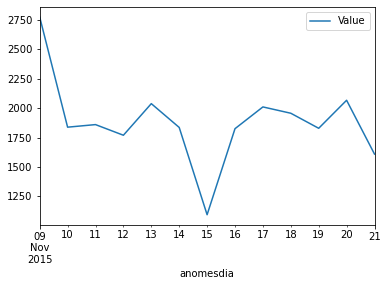

In [22]:
d1.loc[305,:].plot()

<AxesSubplot:xlabel='anomesdia'>

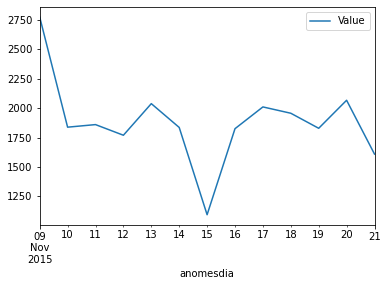

In [23]:
d1.reset_index().loc[d1.reset_index().SiteId==305].set_index('anomesdia')[['Value']].plot()

<AxesSubplot:xlabel='anomesdia'>

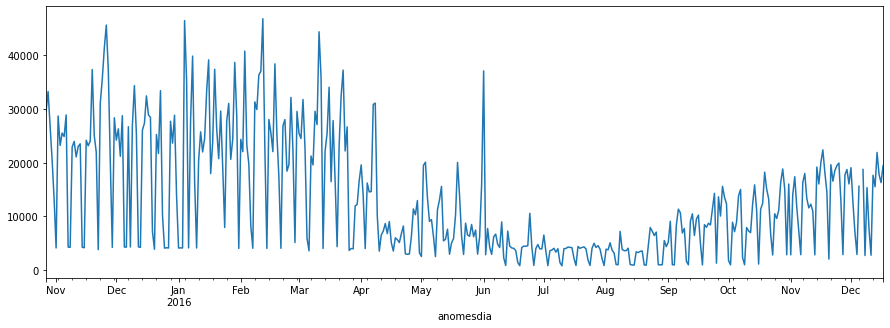

In [47]:
plt.figure(figsize=(15,5))
d1.reset_index().loc[lambda df: df.SiteId==182].set_index('anomesdia').Value.plot()

# O que significa essa linha reta???

 - Nessa visualização ele **conecta os pontos adjacentes**!!
 - Cuidado com **artefatos de visualização**!

<AxesSubplot:xlabel='anomesdia'>

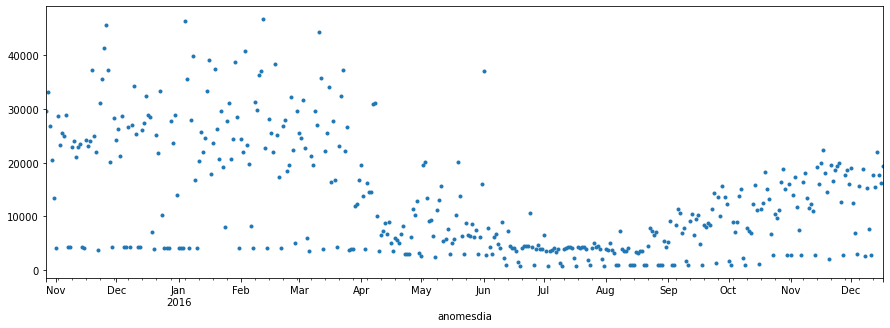

In [48]:
plt.figure(figsize=(15,5))
d1.reset_index().loc[lambda df: df.SiteId==182].set_index('anomesdia').Value.plot(marker='.', linestyle='')

# Legal! Será que temos dados de todos os prédios?

 - **NUNCA** parta do pressuposto que os dados estão ideais: Erros acontecem, e é nosso papel lidar com eles!

In [49]:
df.reset_index().groupby('SiteId').anomesdia.nunique()

SiteId
1      1138
2      1369
3        54
6      1394
7       568
       ... 
301    1387
302    1333
303    1387
304     568
305      13
Name: anomesdia, Length: 260, dtype: int64

<AxesSubplot:xlabel='anomesdia'>

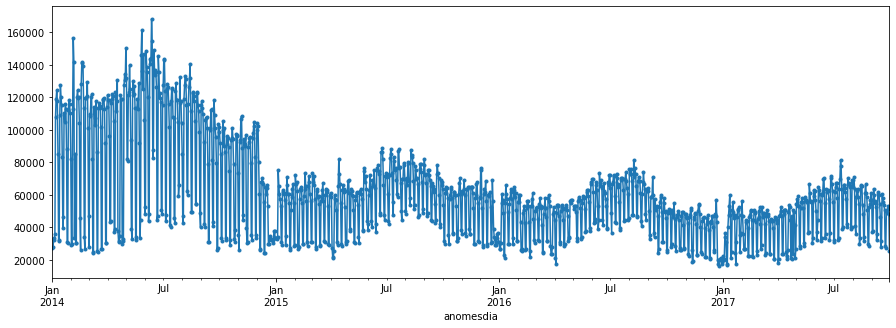

In [51]:
plt.figure(figsize=(15,5))
d1.reset_index().loc[lambda df: df.SiteId==2].set_index('anomesdia').Value.plot(marker='.', linestyle='-')

<AxesSubplot:xlabel='anomesdia'>

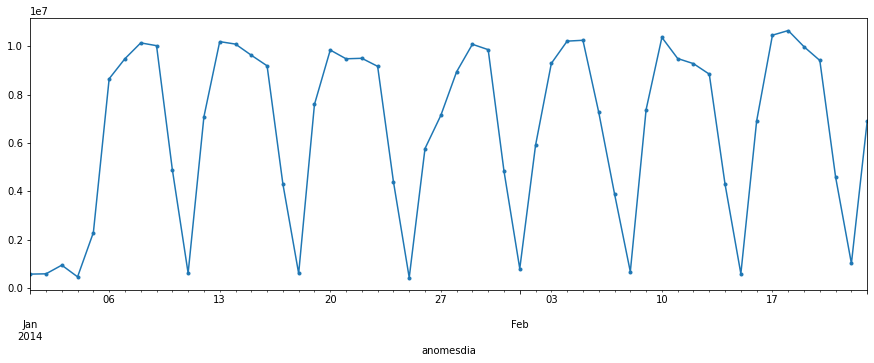

In [52]:
plt.figure(figsize=(15,5))
d1.reset_index().loc[lambda df: df.SiteId==3].set_index('anomesdia').Value.plot(marker='.', linestyle='-')

### Conversa com a área de negócio

> Realmente, no começo ainda estávamos instalando e ajustando os sensores. Mas, em geral, priorizamos instalar sensores mais rapidamente nos prédios de maior consumo. Se algum deles tiver poucos dados, não precisa nem considerar na predição. 
>
> **Se for o caso, pode tirar os casos com pouco histórico da conta**.
>
> **Se preocupe por hora, só com os prédios com mais medidas**

#### Ok, esse é um momento pra consolidarmos esse aprendizado

 - O que parecia ser uma base com um volume BEM grande de dados, aqui ficou bem mais limitada do que esperávamos, por limitações sistêmicas.
 
 - Note que, no longo prazo, dados serão gerados, e poderemos aprimorar esse modelo para novos casos. Mas, ao invés de ficarmos usando o tempo disponível para "cobrir" esses dados, **nós pegamos orientação da área de negócio sobre como prosseguir**.
 
<br/>
<center style="font-size:14pt;">As principais decisões devem ser tomadas em conjunto com quem vai usar o modelo lá na ponta</center>
<br/>
<center style="font-size:14pt;">Para que o modelo seja útil, precisamos <u>ouvir</u> quem será beneficiado com ele.</center>

In [53]:
aux = df.reset_index().groupby('SiteId').anomesdia.nunique()
aux

SiteId
1      1138
2      1369
3        54
6      1394
7       568
       ... 
301    1387
302    1333
303    1387
304     568
305      13
Name: anomesdia, Length: 260, dtype: int64

In [54]:
aux.loc[ aux > 100 ]

SiteId
1      1138
2      1369
6      1394
7       568
8      1160
       ... 
300     964
301    1387
302    1333
303    1387
304     568
Name: anomesdia, Length: 230, dtype: int64

In [55]:
aux.loc[ aux > 100 ].index

Int64Index([  1,   2,   6,   7,   8,   9,  10,  12,  13,  14,
            ...
            293, 294, 295, 298, 299, 300, 301, 302, 303, 304],
           dtype='int64', name='SiteId', length=230)

In [56]:
limiar = int( aux.max() * 0.50 )
limiar

710

In [57]:
aux.loc[ aux > limiar ].index

Int64Index([  1,   2,   6,   8,   9,  10,  13,  14,  16,  17,
            ...
            287, 290, 292, 294, 295, 298, 300, 301, 302, 303],
           dtype='int64', name='SiteId', length=105)

<hr />

### Vamos tentar encontrar esses prédios com pouco preenchimento!

Para isso precisamos **transformar uma coluna em várias!**

In [58]:
d1

Value
SiteId anomesdia               
1      2014-09-03  9.096555e+05
       2014-09-04  1.748273e+06
       2014-09-05           NaN
       2014-09-06           NaN
       2014-09-07           NaN
...                         ...
305    2015-11-17  2.009783e+03
       2015-11-18  1.956134e+03
       2015-11-19  1.828312e+03
       2015-11-20  2.066380e+03
       2015-11-21  1.609226e+03

[182367 rows x 1 columns]

In [59]:
d1.unstack('SiteId')

Value                                                              \
SiteId       1             2             3             6   7             8     
anomesdia                                                                      
2014-01-01   NaN  27544.962283  5.856678e+05  20902.894485 NaN  15389.441497   
2014-01-02   NaN  27796.693028  5.973554e+05  21292.800035 NaN  15639.449518   
2014-01-03   NaN  33271.643392  9.552125e+05  23196.813708 NaN  15987.608177   
2014-01-04   NaN  32460.715987  4.731477e+05  21112.806508 NaN  14768.628637   
2014-01-05   NaN  36153.753829  2.301390e+06  20339.751195 NaN  14771.103732   
...          ...           ...           ...           ...  ..           ...   
2017-12-24   NaN           NaN           NaN           NaN NaN           NaN   
2017-12-25   NaN           NaN           NaN           NaN NaN           NaN   
2017-12-26   NaN           NaN           NaN           NaN NaN           NaN   
2017-12-27   NaN           NaN           NaN           NaN NaN           NaN   
2017-12-28   NaN           NaN           NaN           NaN NaN           NaN   

                                                          ...                  \
SiteId              9              10            12  13   ... 294 295 298 299   
anomesdia                                                 ...                   
2014-01-01  1318.824590  969468.176619           NaN NaN  ... NaN NaN NaN NaN   
2014-01-02  1140.249308  976880.717838           NaN NaN  ... NaN NaN NaN NaN   
2014-01-03  1168.817783  994988.221498           NaN NaN  ... NaN NaN NaN NaN   
2014-01-04  1967.956480  900614.241490           NaN NaN  ... NaN NaN NaN NaN   
2014-01-05  1973.123610  901094.996884           NaN NaN  ... NaN NaN NaN NaN   
...                 ...            ...           ...  ..  ...  ..  ..  ..  ..   
2017-12-24          NaN            NaN  8.883722e+06 NaN  ... NaN NaN NaN NaN   
2017-12-25          NaN            NaN  9.089413e+06 NaN  ... NaN NaN NaN NaN   
2017-12-26          NaN            NaN  9.170568e+06 NaN  ... NaN NaN NaN NaN   
2017-12-27          NaN            NaN  9.292754e+06 NaN  ... NaN NaN NaN NaN   
2017-12-28          NaN            NaN  9.291960e+06 NaN  ... NaN NaN NaN NaN   

                                                                  
SiteId     300           301           302           303 304 305  
anomesdia                                                         
2014-01-01 NaN  1.436165e+06  43673.025953  1.033647e+07 NaN NaN  
2014-01-02 NaN  1.436165e+06  43673.025953  1.033647e+07 NaN NaN  
2014-01-03 NaN  1.436165e+06  43673.025953  1.033647e+07 NaN NaN  
2014-01-04 NaN  1.436165e+06  43673.025953  1.033647e+07 NaN NaN  
2014-01-05 NaN  1.436165e+06  43673.025953  1.033647e+07 NaN NaN  
...         ..           ...           ...           ...  ..  ..  
2017-12-24 NaN           NaN           NaN           NaN NaN NaN  
2017-12-25 NaN           NaN           NaN           NaN NaN NaN  
2017-12-26 NaN           NaN           NaN           NaN NaN NaN  
2017-12-27 NaN           NaN           NaN           NaN NaN NaN  
2017-12-28 NaN           NaN           NaN           NaN NaN NaN  

[1458 rows x 260 columns]

<AxesSubplot:xlabel='anomesdia'>

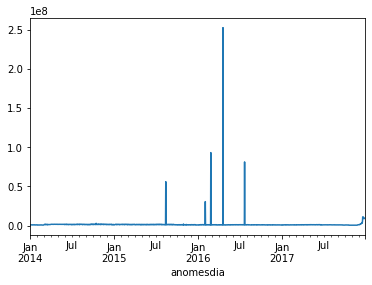

In [62]:
d1.unstack('SiteId').mean(axis=1).plot()

(0.0, 2000000.0)

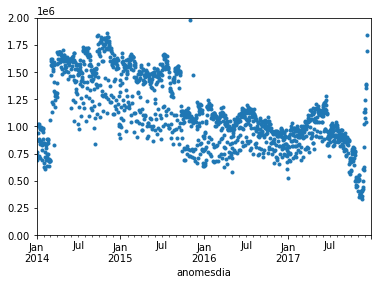

In [66]:
d1.unstack('SiteId').mean(axis=1).plot(marker='.', linestyle='')
plt.ylim(bottom=0, top=.2e7)

# Ok....quantos "valores faltantes" eu tenho por local?

In [67]:
d1

Value
SiteId anomesdia               
1      2014-09-03  9.096555e+05
       2014-09-04  1.748273e+06
       2014-09-05           NaN
       2014-09-06           NaN
       2014-09-07           NaN
...                         ...
305    2015-11-17  2.009783e+03
       2015-11-18  1.956134e+03
       2015-11-19  1.828312e+03
       2015-11-20  2.066380e+03
       2015-11-21  1.609226e+03

[182367 rows x 1 columns]

In [68]:
d1.unstack('SiteId')

Value                                                              \
SiteId       1             2             3             6   7             8     
anomesdia                                                                      
2014-01-01   NaN  27544.962283  5.856678e+05  20902.894485 NaN  15389.441497   
2014-01-02   NaN  27796.693028  5.973554e+05  21292.800035 NaN  15639.449518   
2014-01-03   NaN  33271.643392  9.552125e+05  23196.813708 NaN  15987.608177   
2014-01-04   NaN  32460.715987  4.731477e+05  21112.806508 NaN  14768.628637   
2014-01-05   NaN  36153.753829  2.301390e+06  20339.751195 NaN  14771.103732   
...          ...           ...           ...           ...  ..           ...   
2017-12-24   NaN           NaN           NaN           NaN NaN           NaN   
2017-12-25   NaN           NaN           NaN           NaN NaN           NaN   
2017-12-26   NaN           NaN           NaN           NaN NaN           NaN   
2017-12-27   NaN           NaN           NaN           NaN NaN           NaN   
2017-12-28   NaN           NaN           NaN           NaN NaN           NaN   

                                                          ...                  \
SiteId              9              10            12  13   ... 294 295 298 299   
anomesdia                                                 ...                   
2014-01-01  1318.824590  969468.176619           NaN NaN  ... NaN NaN NaN NaN   
2014-01-02  1140.249308  976880.717838           NaN NaN  ... NaN NaN NaN NaN   
2014-01-03  1168.817783  994988.221498           NaN NaN  ... NaN NaN NaN NaN   
2014-01-04  1967.956480  900614.241490           NaN NaN  ... NaN NaN NaN NaN   
2014-01-05  1973.123610  901094.996884           NaN NaN  ... NaN NaN NaN NaN   
...                 ...            ...           ...  ..  ...  ..  ..  ..  ..   
2017-12-24          NaN            NaN  8.883722e+06 NaN  ... NaN NaN NaN NaN   
2017-12-25          NaN            NaN  9.089413e+06 NaN  ... NaN NaN NaN NaN   
2017-12-26          NaN            NaN  9.170568e+06 NaN  ... NaN NaN NaN NaN   
2017-12-27          NaN            NaN  9.292754e+06 NaN  ... NaN NaN NaN NaN   
2017-12-28          NaN            NaN  9.291960e+06 NaN  ... NaN NaN NaN NaN   

                                                                  
SiteId     300           301           302           303 304 305  
anomesdia                                                         
2014-01-01 NaN  1.436165e+06  43673.025953  1.033647e+07 NaN NaN  
2014-01-02 NaN  1.436165e+06  43673.025953  1.033647e+07 NaN NaN  
2014-01-03 NaN  1.436165e+06  43673.025953  1.033647e+07 NaN NaN  
2014-01-04 NaN  1.436165e+06  43673.025953  1.033647e+07 NaN NaN  
2014-01-05 NaN  1.436165e+06  43673.025953  1.033647e+07 NaN NaN  
...         ..           ...           ...           ...  ..  ..  
2017-12-24 NaN           NaN           NaN           NaN NaN NaN  
2017-12-25 NaN           NaN           NaN           NaN NaN NaN  
2017-12-26 NaN           NaN           NaN           NaN NaN NaN  
2017-12-27 NaN           NaN           NaN           NaN NaN NaN  
2017-12-28 NaN           NaN           NaN           NaN NaN NaN  

[1458 rows x 260 columns]

In [69]:
d1.unstack('SiteId').isnull()

Value                                                               \
SiteId       1      2      3      6     7      8      9      10     12    13    
anomesdia                                                                       
2014-01-01  True  False  False  False  True  False  False  False   True  True   
2014-01-02  True  False  False  False  True  False  False  False   True  True   
2014-01-03  True  False  False  False  True  False  False  False   True  True   
2014-01-04  True  False  False  False  True  False  False  False   True  True   
2014-01-05  True  False  False  False  True  False  False  False   True  True   
...          ...    ...    ...    ...   ...    ...    ...    ...    ...   ...   
2017-12-24  True   True   True   True  True   True   True   True  False  True   
2017-12-25  True   True   True   True  True   True   True   True  False  True   
2017-12-26  True   True   True   True  True   True   True   True  False  True   
2017-12-27  True   True   True   True  True   True   True   True  False  True   
2017-12-28  True   True   True   True  True   True   True   True  False  True   

            ...                                                                 
SiteId      ...   294   295   298   299   300    301    302    303   304   305  
anomesdia   ...                                                                 
2014-01-01  ...  True  True  True  True  True  False  False  False  True  True  
2014-01-02  ...  True  True  True  True  True  False  False  False  True  True  
2014-01-03  ...  True  True  True  True  True  False  False  False  True  True  
2014-01-04  ...  True  True  True  True  True  False  False  False  True  True  
2014-01-05  ...  True  True  True  True  True  False  False  False  True  True  
...         ...   ...   ...   ...   ...   ...    ...    ...    ...   ...   ...  
2017-12-24  ...  True  True  True  True  True   True   True   True  True  True  
2017-12-25  ...  True  True  True  True  True   True   True   True  True  True  
2017-12-26  ...  True  True  True  True  True   True   True   True  True  True  
2017-12-27  ...  True  True  True  True  True   True   True   True  True  True  
2017-12-28  ...  True  True  True  True  True   True   True   True  True  True  

[1458 rows x 260 columns]

In [70]:
d1.unstack('SiteId').isnull().mean()

       SiteId
Value  1         0.231824
       2         0.062414
       3         0.962963
       6         0.047325
       7         0.619342
                   ...   
       301       0.048697
       302       0.085734
       303       0.048697
       304       0.610425
       305       0.991084
Length: 260, dtype: float64

### Vamos selecionar apenas aquele que tem preenchimento de, ao menos, $50\%$

In [71]:
d1.unstack('SiteId').loc[:, d1.unstack('SiteId').isnull().mean() < .50 ]

Value                                                         \
SiteId       1             2             6             8            9     
anomesdia                                                                 
2014-01-01   NaN  27544.962283  20902.894485  15389.441497  1318.824590   
2014-01-02   NaN  27796.693028  21292.800035  15639.449518  1140.249308   
2014-01-03   NaN  33271.643392  23196.813708  15987.608177  1168.817783   
2014-01-04   NaN  32460.715987  21112.806508  14768.628637  1967.956480   
2014-01-05   NaN  36153.753829  20339.751195  14771.103732  1973.123610   
...          ...           ...           ...           ...          ...   
2017-12-24   NaN           NaN           NaN           NaN          NaN   
2017-12-25   NaN           NaN           NaN           NaN          NaN   
2017-12-26   NaN           NaN           NaN           NaN          NaN   
2017-12-27   NaN           NaN           NaN           NaN          NaN   
2017-12-28   NaN           NaN           NaN           NaN          NaN   

                                           ...                                \
SiteId                10  13  14  16  17   ... 287           290 292 294 295   
anomesdia                                  ...                                 
2014-01-01  969468.176619 NaN NaN NaN NaN  ... NaN  8.662848e+06 NaN NaN NaN   
2014-01-02  976880.717838 NaN NaN NaN NaN  ... NaN  8.662848e+06 NaN NaN NaN   
2014-01-03  994988.221498 NaN NaN NaN NaN  ... NaN  8.662848e+06 NaN NaN NaN   
2014-01-04  900614.241490 NaN NaN NaN NaN  ... NaN  8.662848e+06 NaN NaN NaN   
2014-01-05  901094.996884 NaN NaN NaN NaN  ... NaN  8.662848e+06 NaN NaN NaN   
...                   ...  ..  ..  ..  ..  ...  ..           ...  ..  ..  ..   
2017-12-24            NaN NaN NaN NaN NaN  ... NaN           NaN NaN NaN NaN   
2017-12-25            NaN NaN NaN NaN NaN  ... NaN           NaN NaN NaN NaN   
2017-12-26            NaN NaN NaN NaN NaN  ... NaN           NaN NaN NaN NaN   
2017-12-27            NaN NaN NaN NaN NaN  ... NaN           NaN NaN NaN NaN   
2017-12-28            NaN NaN NaN NaN NaN  ... NaN           NaN NaN NaN NaN   

                                                              
SiteId     298 300           301           302           303  
anomesdia                                                     
2014-01-01 NaN NaN  1.436165e+06  43673.025953  1.033647e+07  
2014-01-02 NaN NaN  1.436165e+06  43673.025953  1.033647e+07  
2014-01-03 NaN NaN  1.436165e+06  43673.025953  1.033647e+07  
2014-01-04 NaN NaN  1.436165e+06  43673.025953  1.033647e+07  
2014-01-05 NaN NaN  1.436165e+06  43673.025953  1.033647e+07  
...         ..  ..           ...           ...           ...  
2017-12-24 NaN NaN           NaN           NaN           NaN  
2017-12-25 NaN NaN           NaN           NaN           NaN  
2017-12-26 NaN NaN           NaN           NaN           NaN  
2017-12-27 NaN NaN           NaN           NaN           NaN  
2017-12-28 NaN NaN           NaN           NaN           NaN  

[1458 rows x 98 columns]

In [75]:
d1.unstack('SiteId').loc[:, d1.unstack('SiteId').isnull().mean() < .50 ].ffill()

Value                                            \
SiteId               1             2             6             8     
anomesdia                                                            
2014-01-01           NaN  27544.962283  20902.894485  15389.441497   
2014-01-02           NaN  27796.693028  21292.800035  15639.449518   
2014-01-03           NaN  33271.643392  23196.813708  15987.608177   
2014-01-04           NaN  32460.715987  21112.806508  14768.628637   
2014-01-05           NaN  36153.753829  20339.751195  14771.103732   
...                  ...           ...           ...           ...   
2017-12-24  4.008260e+06  25562.745621  16708.031919  16549.536611   
2017-12-25  4.008260e+06  25562.745621  16708.031919  16549.536611   
2017-12-26  4.008260e+06  25562.745621  16708.031919  16549.536611   
2017-12-27  4.008260e+06  25562.745621  16708.031919  16549.536611   
2017-12-28  4.008260e+06  25562.745621  16708.031919  16549.536611   

                                                                   \
SiteId              9             10            13            14    
anomesdia                                                           
2014-01-01  1318.824590  9.694682e+05           NaN           NaN   
2014-01-02  1140.249308  9.768807e+05           NaN           NaN   
2014-01-03  1168.817783  9.949882e+05           NaN           NaN   
2014-01-04  1967.956480  9.006142e+05           NaN           NaN   
2014-01-05  1973.123610  9.010950e+05           NaN           NaN   
...                 ...           ...           ...           ...   
2017-12-24  1915.309821  1.788352e+06  3.190754e+06  29200.035636   
2017-12-25  1915.309821  1.788352e+06  3.190754e+06  29200.035636   
2017-12-26  1915.309821  1.788352e+06  3.190754e+06  29200.035636   
2017-12-27  1915.309821  1.788352e+06  3.190754e+06  29200.035636   
2017-12-28  1915.309821  1.788352e+06  3.190754e+06  29200.035636   

                                         ...                             \
SiteId                16            17   ...          287           290   
anomesdia                                ...                              
2014-01-01            NaN           NaN  ...          NaN  8.662848e+06   
2014-01-02            NaN           NaN  ...          NaN  8.662848e+06   
2014-01-03            NaN           NaN  ...          NaN  8.662848e+06   
2014-01-04            NaN           NaN  ...          NaN  8.662848e+06   
2014-01-05            NaN           NaN  ...          NaN  8.662848e+06   
...                   ...           ...  ...          ...           ...   
2017-12-24  129368.083928  1.276890e+07  ...  1106.206822  9.631678e+06   
2017-12-25  129368.083928  1.276890e+07  ...  1106.206822  9.631678e+06   
2017-12-26  129368.083928  1.276890e+07  ...  1106.206822  9.631678e+06   
2017-12-27  129368.083928  1.276890e+07  ...  1106.206822  9.631678e+06   
2017-12-28  129368.083928  1.276890e+07  ...  1106.206822  9.631678e+06   

                                                                    \
SiteId               292           294           295           298   
anomesdia                                                            
2014-01-01           NaN           NaN           NaN           NaN   
2014-01-02           NaN           NaN           NaN           NaN   
2014-01-03           NaN           NaN           NaN           NaN   
2014-01-04           NaN           NaN           NaN           NaN   
2014-01-05           NaN           NaN           NaN           NaN   
...                  ...           ...           ...           ...   
2017-12-24  73401.231003  23067.329878  13992.974314  18881.814293   
2017-12-25  73401.231003  23067.329878  13992.974314  18881.814293   
2017-12-26  73401.231003  23067.329878  13992.974314  18881.814293   
2017-12-27  73401.231003  23067.329878  13992.974314  18881.814293   
2017-12-28  73401.231003  23067.329878  13992.974314  18881.814293   

                                       

# Ok...mas o que fazemos com os valores nulos que sobram?

 - Não há uma única resposta possível aqui.
 - Pra começar, como eliminamos os casos em que isso é muito frequente, vamos **preencher com o últimos valor observado**
 - Só por contorno para aquelas que estiverem vazias no começo (como a 149), preenchemos de trás pra frente

In [76]:
d1.unstack('SiteId').loc[:, d1.unstack('SiteId').isnull().mean() < .50 ].ffill().bfill()

Value                                            \
SiteId               1             2             6             8     
anomesdia                                                            
2014-01-01  9.096555e+05  27544.962283  20902.894485  15389.441497   
2014-01-02  9.096555e+05  27796.693028  21292.800035  15639.449518   
2014-01-03  9.096555e+05  33271.643392  23196.813708  15987.608177   
2014-01-04  9.096555e+05  32460.715987  21112.806508  14768.628637   
2014-01-05  9.096555e+05  36153.753829  20339.751195  14771.103732   
...                  ...           ...           ...           ...   
2017-12-24  4.008260e+06  25562.745621  16708.031919  16549.536611   
2017-12-25  4.008260e+06  25562.745621  16708.031919  16549.536611   
2017-12-26  4.008260e+06  25562.745621  16708.031919  16549.536611   
2017-12-27  4.008260e+06  25562.745621  16708.031919  16549.536611   
2017-12-28  4.008260e+06  25562.745621  16708.031919  16549.536611   

                                                                   \
SiteId              9             10            13            14    
anomesdia                                                           
2014-01-01  1318.824590  9.694682e+05  1.701635e+06  32780.556363   
2014-01-02  1140.249308  9.768807e+05  1.701635e+06  32780.556363   
2014-01-03  1168.817783  9.949882e+05  1.701635e+06  32780.556363   
2014-01-04  1967.956480  9.006142e+05  1.701635e+06  32780.556363   
2014-01-05  1973.123610  9.010950e+05  1.701635e+06  32780.556363   
...                 ...           ...           ...           ...   
2017-12-24  1915.309821  1.788352e+06  3.190754e+06  29200.035636   
2017-12-25  1915.309821  1.788352e+06  3.190754e+06  29200.035636   
2017-12-26  1915.309821  1.788352e+06  3.190754e+06  29200.035636   
2017-12-27  1915.309821  1.788352e+06  3.190754e+06  29200.035636   
2017-12-28  1915.309821  1.788352e+06  3.190754e+06  29200.035636   

                                         ...                              \
SiteId                16            17   ...           287           290   
anomesdia                                ...                               
2014-01-01   67622.790075  5.320924e+06  ...  17481.969007  8.662848e+06   
2014-01-02   67622.790075  5.320924e+06  ...  17481.969007  8.662848e+06   
2014-01-03   67622.790075  5.320924e+06  ...  17481.969007  8.662848e+06   
2014-01-04   67622.790075  5.320924e+06  ...  17481.969007  8.662848e+06   
2014-01-05   67622.790075  5.320924e+06  ...  17481.969007  8.662848e+06   
...                   ...           ...  ...           ...           ...   
2017-12-24  129368.083928  1.276890e+07  ...   1106.206822  9.631678e+06   
2017-12-25  129368.083928  1.276890e+07  ...   1106.206822  9.631678e+06   
2017-12-26  129368.083928  1.276890e+07  ...   1106.206822  9.631678e+06   
2017-12-27  129368.083928  1.276890e+07  ...   1106.206822  9.631678e+06   
2017-12-28  129368.083928  1.276890e+07  ...   1106.206822  9.631678e+06   

                                                                     \
SiteId                292           294           295           298   
anomesdia                                                             
2014-01-01  182539.392187  57365.473546  41989.113383  22994.610493   
2014-01-02  182539.392187  57365.473546  41989.113383  22994.610493   
2014-01-03  182539.392187  57365.473546  41989.113383  22994.610493   
2014-01-04  182539.392187  57365.473546  41989.113383  22994.610493   
2014-01-05  182539.392187  57365.473546  41989.113383  22994.610493   
...                   ...           ...           ...           ...   
2017-12-24   73401.231003  23067.329878  13992.974314  18881.814293   
2017-12-25   73401.231003  23067.329878  13992.974314  18881.814293   
2017-12-26   73401.231003  23067.329878  13992.974314  18881.814293   
2017-12-27   73401.231003  23067.329878  13992.974314  18881.814293   
2017-12-28   73401.231003  23067.329878  13992.974314  18881.814293   

           

### Legal! Pra fechar, vamos voltar a tabela à nossa visão original, após o preenchimento

In [78]:
d1

Value
SiteId anomesdia               
1      2014-09-03  9.096555e+05
       2014-09-04  1.748273e+06
       2014-09-05           NaN
       2014-09-06           NaN
       2014-09-07           NaN
...                         ...
305    2015-11-17  2.009783e+03
       2015-11-18  1.956134e+03
       2015-11-19  1.828312e+03
       2015-11-20  2.066380e+03
       2015-11-21  1.609226e+03

[182367 rows x 1 columns]

In [80]:
d11 = d1.unstack('SiteId').loc[:, d1.unstack('SiteId').isnull().mean() < .50 ].ffill().bfill().stack().reset_index().sort_values(['SiteId','anomesdia']).set_index(['SiteId','anomesdia'])
d11

Value
SiteId anomesdia               
1      2014-01-01  9.096555e+05
       2014-01-02  9.096555e+05
       2014-01-03  9.096555e+05
       2014-01-04  9.096555e+05
       2014-01-05  9.096555e+05
...                         ...
303    2017-12-24  1.086197e+07
       2017-12-25  1.086197e+07
       2017-12-26  1.086197e+07
       2017-12-27  1.086197e+07
       2017-12-28  1.086197e+07

[142884 rows x 1 columns]

# Vamos ver como ficou?

In [81]:
d11

Value
SiteId anomesdia               
1      2014-01-01  9.096555e+05
       2014-01-02  9.096555e+05
       2014-01-03  9.096555e+05
       2014-01-04  9.096555e+05
       2014-01-05  9.096555e+05
...                         ...
303    2017-12-24  1.086197e+07
       2017-12-25  1.086197e+07
       2017-12-26  1.086197e+07
       2017-12-27  1.086197e+07
       2017-12-28  1.086197e+07

[142884 rows x 1 columns]

<AxesSubplot:xlabel='anomesdia'>

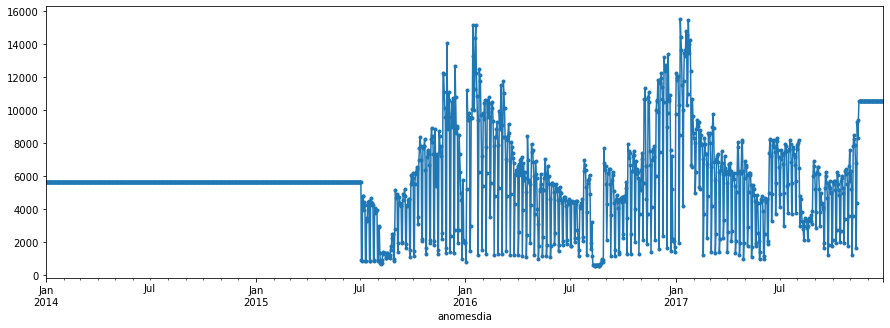

In [82]:
plt.figure(figsize=(15,5))
d11.reset_index().loc[lambda df: df.SiteId==40].set_index('anomesdia').Value.plot(marker='.', linestyle='-')

(16587.0, 16953.0)

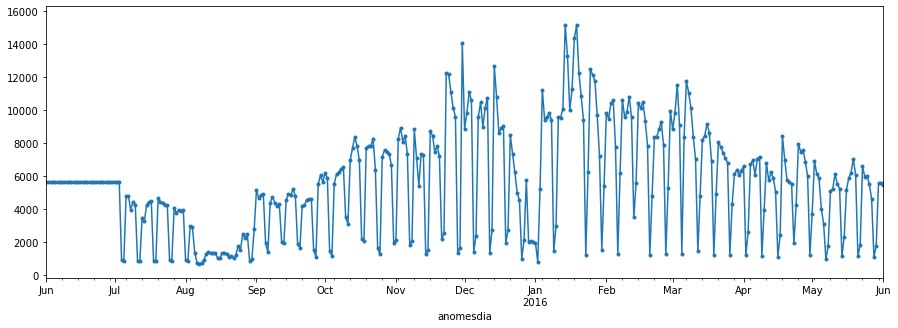

In [83]:
plt.figure(figsize=(15,5))
d11.reset_index().loc[lambda df: df.SiteId==40].set_index('anomesdia').Value.plot(marker='.', linestyle='-')
plt.xlim(left='2015-06-01', right='2016-06-01')

<AxesSubplot:xlabel='anomesdia'>

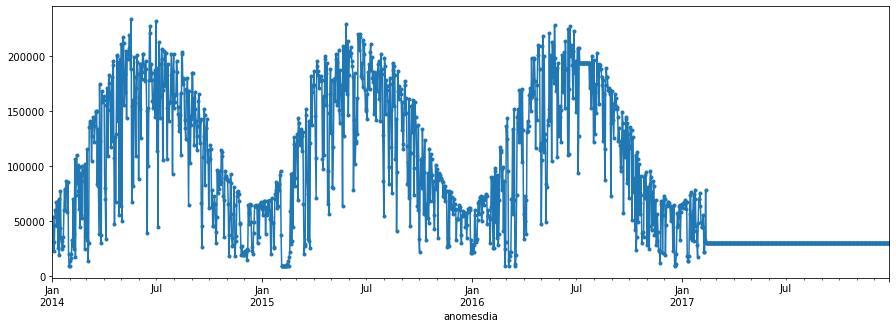

In [85]:
plt.figure(figsize=(15,5))
d11.reset_index().loc[lambda df: df.SiteId==150].set_index('anomesdia').Value.plot(marker='.', linestyle='-')

<AxesSubplot:xlabel='anomesdia'>

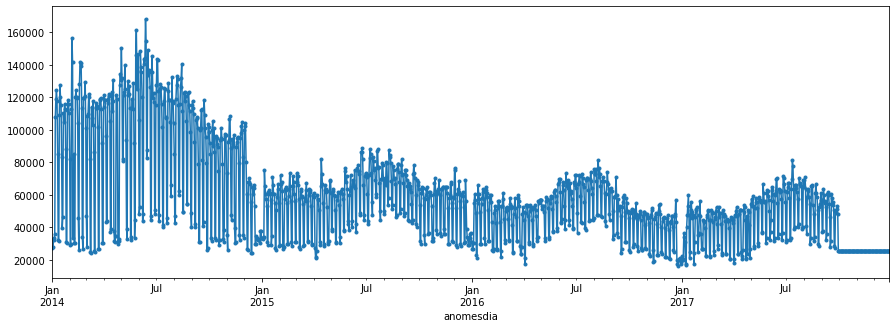

In [86]:
plt.figure(figsize=(15,5))
d11.reset_index().loc[lambda df: df.SiteId==2].set_index('anomesdia').Value.plot(marker='.', linestyle='-')

In [87]:
d11

Value
SiteId anomesdia               
1      2014-01-01  9.096555e+05
       2014-01-02  9.096555e+05
       2014-01-03  9.096555e+05
       2014-01-04  9.096555e+05
       2014-01-05  9.096555e+05
...                         ...
303    2017-12-24  1.086197e+07
       2017-12-25  1.086197e+07
       2017-12-26  1.086197e+07
       2017-12-27  1.086197e+07
       2017-12-28  1.086197e+07

[142884 rows x 1 columns]

# Estamos satisfeitos com a tabela de medidas de energia

<hr />

# Ok....mas e as outras informações?

 - Vamos dar uma olhada na temperatura

In [88]:
weat

,Timestamp,Temperature,Distance,SiteId,anomesdia
0,2017-03-03T19:00:00+00:00,10.6,27.489346,51,2017-03-03
1,2017-03-03T19:20:00+00:00,11.0,28.663082,51,2017-03-03
2,2017-03-03T20:00:00+00:00,6.3,28.307039,51,2017-03-03
3,2017-03-03T21:55:00+00:00,10.0,29.797449,51,2017-03-03
4,2017-03-03T23:00:00+00:00,5.4,28.307039,51,2017-03-03
...,...,...,...,...,...
3957030,2016-09-11T11:00:00+00:00,25.9,28.307039,51,2016-09-11
3957031,2016-09-11T11:20:00+00:00,27.0,27.489346,51,2016-09-11
3957032,2016-09-11T12:00:00+00:00,27.1,28.307039,51,2016-09-11
3957033,2016-09-11T15:50:00+00:00,28.0,27.489346,51,2016-09-11


In [92]:
d2 = weat.groupby(['SiteId','anomesdia','Distance'])[['Temperature']].mean().reset_index()
d2.loc[:,'Distance'] = ((d2.Distance//5)*5).astype(int)

d2

,SiteId,anomesdia,Distance,Temperature
0,2,2013-01-01,5,20.150000
1,2,2013-01-01,10,20.272727
2,2,2013-01-02,5,19.275000
3,2,2013-01-02,10,19.291667
4,2,2013-01-03,5,17.125000
...,...,...,...,...
107519,57,2017-12-28,25,7.029167
107520,57,2017-12-29,5,6.837500
107521,57,2017-12-29,25,5.787500
107522,57,2017-12-30,5,6.586792


### Temperaturas medidas a distâncias diferentes são informações <u>conceitualmente muito diferentes</u>

 - Assim, vamos transformar essas **diversas temperaturas** em **colunas distintas**
 
 
 - Sempre cada coluna deve representar uma **informação de uma única definição**

In [93]:
d2 = d2.pivot_table(
    index=['SiteId','anomesdia'],
    columns='Distance',
    values='Temperature',
    aggfunc='mean'
).add_prefix('Temperature_at_')
d2

Distance           Temperature_at_0  Temperature_at_5  Temperature_at_10  \
SiteId anomesdia                                                           
2      2013-01-01               NaN         20.150000          20.272727   
       2013-01-02               NaN         19.275000          19.291667   
       2013-01-03               NaN         17.125000          17.347826   
       2013-01-04               NaN         17.525000          17.500000   
       2013-01-05               NaN         18.462500          18.541667   
...                             ...               ...                ...   
57     2017-12-26               NaN         11.320755                NaN   
       2017-12-27               NaN         13.001786                NaN   
       2017-12-28               NaN          8.158182                NaN   
       2017-12-29               NaN          6.837500                NaN   
       2017-12-30               NaN          6.586792                NaN   

Distance           Temperature_at_15  Temperature_at_20  Temperature_at_25  
SiteId anomesdia                                                            
2      2013-01-01                NaN                NaN                NaN  
       2013-01-02                NaN                NaN                NaN  
       2013-01-03                NaN                NaN                NaN  
       2013-01-04                NaN                NaN                NaN  
       2013-01-05                NaN                NaN                NaN  
...                              ...                ...                ...  
57     2017-12-26                NaN                NaN          10.187500  
       2017-12-27                NaN                NaN          10.979167  
       2017-12-28                NaN                NaN           7.029167  
       2017-12-29                NaN                NaN           5.787500  
       2017-12-30                NaN                NaN           5.900000  

[56489 rows x 6 columns]

In [95]:
d11

Value
SiteId anomesdia               
1      2014-01-01  9.096555e+05
       2014-01-02  9.096555e+05
       2014-01-03  9.096555e+05
       2014-01-04  9.096555e+05
       2014-01-05  9.096555e+05
...                         ...
303    2017-12-24  1.086197e+07
       2017-12-25  1.086197e+07
       2017-12-26  1.086197e+07
       2017-12-27  1.086197e+07
       2017-12-28  1.086197e+07

[142884 rows x 1 columns]

# Legal! Vamos juntar essas informações!

 - Vamos juntar somente nos casos em que **temos informações de temperatura disponíveis**

In [96]:
d11

Value
SiteId anomesdia               
1      2014-01-01  9.096555e+05
       2014-01-02  9.096555e+05
       2014-01-03  9.096555e+05
       2014-01-04  9.096555e+05
       2014-01-05  9.096555e+05
...                         ...
303    2017-12-24  1.086197e+07
       2017-12-25  1.086197e+07
       2017-12-26  1.086197e+07
       2017-12-27  1.086197e+07
       2017-12-28  1.086197e+07

[142884 rows x 1 columns]

In [97]:
d2

Distance           Temperature_at_0  Temperature_at_5  Temperature_at_10  \
SiteId anomesdia                                                           
2      2013-01-01               NaN         20.150000          20.272727   
       2013-01-02               NaN         19.275000          19.291667   
       2013-01-03               NaN         17.125000          17.347826   
       2013-01-04               NaN         17.525000          17.500000   
       2013-01-05               NaN         18.462500          18.541667   
...                             ...               ...                ...   
57     2017-12-26               NaN         11.320755                NaN   
       2017-12-27               NaN         13.001786                NaN   
       2017-12-28               NaN          8.158182                NaN   
       2017-12-29               NaN          6.837500                NaN   
       2017-12-30               NaN          6.586792                NaN   

Distance           Temperature_at_15  Temperature_at_20  Temperature_at_25  
SiteId anomesdia                                                            
2      2013-01-01                NaN                NaN                NaN  
       2013-01-02                NaN                NaN                NaN  
       2013-01-03                NaN                NaN                NaN  
       2013-01-04                NaN                NaN                NaN  
       2013-01-05                NaN                NaN                NaN  
...                              ...                ...                ...  
57     2017-12-26                NaN                NaN          10.187500  
       2017-12-27                NaN                NaN          10.979167  
       2017-12-28                NaN                NaN           7.029167  
       2017-12-29                NaN                NaN           5.787500  
       2017-12-30                NaN                NaN           5.900000  

[56489 rows x 6 columns]

In [103]:
lista_para_jogar_fora = [ x for x in d11.reset_index().SiteId.unique() if x not in d2.reset_index().SiteId.unique() ]
lista_para_jogar_fora

[1,
 14,
 86,
 87,
 88,
 93,
 98,
 99,
 100,
 109,
 115,
 119,
 120,
 121,
 122,
 123,
 129,
 131,
 134,
 135,
 140,
 150,
 151,
 154,
 155,
 157,
 164,
 180,
 189,
 190,
 193,
 195,
 197,
 198,
 199,
 200,
 201,
 203,
 207,
 209,
 212,
 213,
 221,
 232,
 233,
 234,
 235,
 237,
 241,
 250,
 259,
 260,
 261,
 265,
 268,
 269,
 270,
 271,
 273,
 274,
 275,
 276,
 277,
 279,
 280,
 281,
 282,
 284,
 286,
 287,
 290,
 292,
 294,
 295,
 298,
 300,
 301,
 302,
 303]

In [104]:
d11

Value
SiteId anomesdia               
1      2014-01-01  9.096555e+05
       2014-01-02  9.096555e+05
       2014-01-03  9.096555e+05
       2014-01-04  9.096555e+05
       2014-01-05  9.096555e+05
...                         ...
303    2017-12-24  1.086197e+07
       2017-12-25  1.086197e+07
       2017-12-26  1.086197e+07
       2017-12-27  1.086197e+07
       2017-12-28  1.086197e+07

[142884 rows x 1 columns]

# `~` significa NÃO

In [105]:
d11 = d11.reset_index().loc[~d11.reset_index().SiteId.isin(lista_para_jogar_fora)]
d11

,SiteId,anomesdia,Value
1458,2,2014-01-01,27544.962283
1459,2,2014-01-02,27796.693028
1460,2,2014-01-03,33271.643392
1461,2,2014-01-04,32460.715987
1462,2,2014-01-05,36153.753829
...,...,...,...
30613,42,2017-12-24,20279.161247
30614,42,2017-12-25,20279.161247
30615,42,2017-12-26,20279.161247
30616,42,2017-12-27,20279.161247


### E agora, vamos juntar essas informações!

In [106]:
d11.set_index(['SiteId','anomesdia'])

Value
SiteId anomesdia               
2      2014-01-01  27544.962283
       2014-01-02  27796.693028
       2014-01-03  33271.643392
       2014-01-04  32460.715987
       2014-01-05  36153.753829
...                         ...
42     2017-12-24  20279.161247
       2017-12-25  20279.161247
       2017-12-26  20279.161247
       2017-12-27  20279.161247
       2017-12-28  20279.161247

[27702 rows x 1 columns]

In [107]:
d2

Distance           Temperature_at_0  Temperature_at_5  Temperature_at_10  \
SiteId anomesdia                                                           
2      2013-01-01               NaN         20.150000          20.272727   
       2013-01-02               NaN         19.275000          19.291667   
       2013-01-03               NaN         17.125000          17.347826   
       2013-01-04               NaN         17.525000          17.500000   
       2013-01-05               NaN         18.462500          18.541667   
...                             ...               ...                ...   
57     2017-12-26               NaN         11.320755                NaN   
       2017-12-27               NaN         13.001786                NaN   
       2017-12-28               NaN          8.158182                NaN   
       2017-12-29               NaN          6.837500                NaN   
       2017-12-30               NaN          6.586792                NaN   

Distance           Temperature_at_15  Temperature_at_20  Temperature_at_25  
SiteId anomesdia                                                            
2      2013-01-01                NaN                NaN                NaN  
       2013-01-02                NaN                NaN                NaN  
       2013-01-03                NaN                NaN                NaN  
       2013-01-04                NaN                NaN                NaN  
       2013-01-05                NaN                NaN                NaN  
...                              ...                ...                ...  
57     2017-12-26                NaN                NaN          10.187500  
       2017-12-27                NaN                NaN          10.979167  
       2017-12-28                NaN                NaN           7.029167  
       2017-12-29                NaN                NaN           5.787500  
       2017-12-30                NaN                NaN           5.900000  

[56489 rows x 6 columns]

In [110]:
d12 = d11.set_index(['SiteId','anomesdia']).join(d2, how='left')
d12

Value  Temperature_at_0  Temperature_at_5  \
SiteId anomesdia                                                      
2      2014-01-01  27544.962283               NaN         17.042857   
       2014-01-02  27796.693028               NaN         19.075000   
       2014-01-03  33271.643392               NaN         20.300000   
       2014-01-04  32460.715987               NaN         21.862500   
       2014-01-05  36153.753829               NaN         20.612500   
...                         ...               ...               ...   
42     2017-12-24  20279.161247               NaN          8.748214   
       2017-12-25  20279.161247               NaN         10.205455   
       2017-12-26  20279.161247               NaN         11.320755   
       2017-12-27  20279.161247               NaN         13.001786   
       2017-12-28  20279.161247               NaN          8.158182   

                   Temperature_at_10  Temperature_at_15  Temperature_at_20  \
SiteId anomesdia                                                             
2      2014-01-01          17.708333                NaN                NaN   
       2014-01-02          19.020833                NaN                NaN   
       2014-01-03          20.520833                NaN                NaN   
       2014-01-04          22.020833                NaN                NaN   
       2014-01-05          20.750000                NaN                NaN   
...                              ...                ...                ...   
42     2017-12-24                NaN                NaN                NaN   
       2017-12-25                NaN                NaN                NaN   
       2017-12-26                NaN                NaN                NaN   
       2017-12-27                NaN                NaN                NaN   
       2017-12-28                NaN                NaN                NaN   

                   Temperature_at_25  
SiteId anomesdia                      
2      2014-01-01                NaN  
       2014-01-02                NaN  
       2014-01-03                NaN  
       2014-01-04                NaN  
       2014-01-05                NaN  
...                              ...  
42     2017-12-24           7.720833  
       2017-12-25           9.259879  
       2017-12-26          10.009375  
       2017-12-27          11.536458  
       2017-12-28           7.905208  

[27702 rows x 7 columns]

# Legal! E pra fechar, vamos juntar com as inforamações de feriados!

In [111]:
meta

,SiteId,Surface,Sampling,BaseTemperature,MondayIsDayOff,TuesdayIsDayOff,WednesdayIsDayOff,ThursdayIsDayOff,FridayIsDayOff,SaturdayIsDayOff,SundayIsDayOff
0,207,7964.873347,30.0,18.0,False,False,False,False,False,True,True
1,7,15168.125971,30.0,18.0,False,False,False,False,False,True,True
2,74,424.340663,15.0,18.0,False,False,False,False,False,True,True
3,239,1164.822636,15.0,18.0,False,False,False,False,False,True,True
4,274,1468.246690,5.0,18.0,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...
262,192,11188.881545,15.0,18.0,False,False,False,False,False,True,True
263,58,1149.050606,15.0,18.0,False,False,False,False,False,True,True
264,123,5470.205018,15.0,18.0,False,False,False,False,False,True,True
265,122,6843.612340,15.0,18.0,False,False,False,False,False,True,True


In [114]:
d12.reset_index().set_index('SiteId')

,anomesdia,Value,Temperature_at_0,Temperature_at_5,Temperature_at_10,Temperature_at_15,Temperature_at_20,Temperature_at_25
SiteId,,,,,,,,
2,2014-01-01,27544.962283,NaN,17.042857,17.708333,NaN,NaN,NaN
2,2014-01-02,27796.693028,NaN,19.075000,19.020833,NaN,NaN,NaN
2,2014-01-03,33271.643392,NaN,20.300000,20.520833,NaN,NaN,NaN
2,2014-01-04,32460.715987,NaN,21.862500,22.020833,NaN,NaN,NaN
2,2014-01-05,36153.753829,NaN,20.612500,20.750000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
42,2017-12-24,20279.161247,NaN,8.748214,NaN,NaN,NaN,7.720833
42,2017-12-25,20279.161247,NaN,10.205455,NaN,NaN,NaN,9.259879
42,2017-12-26,20279.161247,NaN,11.320755,NaN,NaN,NaN,10.009375


In [112]:
d123 = d12.reset_index().set_index('SiteId').join(meta.set_index('SiteId'))
d123

,anomesdia,Value,Temperature_at_0,Temperature_at_5,Temperature_at_10,Temperature_at_15,Temperature_at_20,Temperature_at_25,Surface,Sampling,BaseTemperature,MondayIsDayOff,TuesdayIsDayOff,WednesdayIsDayOff,ThursdayIsDayOff,FridayIsDayOff,SaturdayIsDayOff,SundayIsDayOff
SiteId,,,,,,,,,,,,,,,,,,
2,2014-01-01,27544.962283,NaN,17.042857,17.708333,NaN,NaN,NaN,6098.278376,30.0,18.0,False,False,False,False,False,True,True
2,2014-01-02,27796.693028,NaN,19.075000,19.020833,NaN,NaN,NaN,6098.278376,30.0,18.0,False,False,False,False,False,True,True
2,2014-01-03,33271.643392,NaN,20.300000,20.520833,NaN,NaN,NaN,6098.278376,30.0,18.0,False,False,False,False,False,True,True
2,2014-01-04,32460.715987,NaN,21.862500,22.020833,NaN,NaN,NaN,6098.278376,30.0,18.0,False,False,False,False,False,True,True
2,2014-01-05,36153.753829,NaN,20.612500,20.750000,NaN,NaN,NaN,6098.278376,30.0,18.0,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,2017-12-24,20279.161247,NaN,8.748214,NaN,NaN,NaN,7.720833,1032.735063,15.0,18.0,False,False,False,False,False,True,True
42,2017-12-25,20279.161247,NaN,10.205455,NaN,NaN,NaN,9.259879,1032.735063,15.0,18.0,False,False,False,False,False,True,True
42,2017-12-26,20279.161247,NaN,11.320755,NaN,NaN,NaN,10.009375,1032.735063,15.0,18.0,False,False,False,False,False,True,True


### De novo, o conceito que importa é "nesse dia, em particular, foi feriado ou não"?

 - Vamos criar essas colunas!

In [115]:
d123.loc[:,'DayOff'] = \
    (d123.anomesdia.dt.weekday==0).astype(int)*d123.MondayIsDayOff.astype(int) + \
    (d123.anomesdia.dt.weekday==1).astype(int)*d123.TuesdayIsDayOff.astype(int) + \
    (d123.anomesdia.dt.weekday==2).astype(int)*d123.WednesdayIsDayOff.astype(int) + \
    (d123.anomesdia.dt.weekday==3).astype(int)*d123.ThursdayIsDayOff.astype(int) + \
    (d123.anomesdia.dt.weekday==4).astype(int)*d123.FridayIsDayOff.astype(int) + \
    (d123.anomesdia.dt.weekday==5).astype(int)*d123.SaturdayIsDayOff.astype(int) + \
    (d123.anomesdia.dt.weekday==6).astype(int)*d123.SundayIsDayOff.astype(int)

d123 = d123.drop([
    'MondayIsDayOff',
    'TuesdayIsDayOff',
    'WednesdayIsDayOff',
    'ThursdayIsDayOff',
    'FridayIsDayOff',
    'SaturdayIsDayOff',
    'SundayIsDayOff',
], axis=1).reset_index()

d123

,SiteId,anomesdia,Value,Temperature_at_0,Temperature_at_5,Temperature_at_10,Temperature_at_15,Temperature_at_20,Temperature_at_25,Surface,Sampling,BaseTemperature,DayOff
0,2,2014-01-01,27544.962283,NaN,17.042857,17.708333,NaN,NaN,NaN,6098.278376,30.0,18.0,0
1,2,2014-01-02,27796.693028,NaN,19.075000,19.020833,NaN,NaN,NaN,6098.278376,30.0,18.0,0
2,2,2014-01-03,33271.643392,NaN,20.300000,20.520833,NaN,NaN,NaN,6098.278376,30.0,18.0,0
3,2,2014-01-04,32460.715987,NaN,21.862500,22.020833,NaN,NaN,NaN,6098.278376,30.0,18.0,1
4,2,2014-01-05,36153.753829,NaN,20.612500,20.750000,NaN,NaN,NaN,6098.278376,30.0,18.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27697,42,2017-12-24,20279.161247,NaN,8.748214,NaN,NaN,NaN,7.720833,1032.735063,15.0,18.0,1
27698,42,2017-12-25,20279.161247,NaN,10.205455,NaN,NaN,NaN,9.259879,1032.735063,15.0,18.0,0
27699,42,2017-12-26,20279.161247,NaN,11.320755,NaN,NaN,NaN,10.009375,1032.735063,15.0,18.0,0
27700,42,2017-12-27,20279.161247,NaN,13.001786,NaN,NaN,NaN,11.536458,1032.735063,15.0,18.0,0


### Pra "morrer de certeza", vamos checar se nossas medidas de consumo energético tem valores faltantes?

 - Lembrando que <u>já fizemos o `ffill`e o `bfill` lá em cima!

In [116]:
d123.loc[ d123.Value.isnull() ]

,SiteId,anomesdia,Value,Temperature_at_0,Temperature_at_5,Temperature_at_10,Temperature_at_15,Temperature_at_20,Temperature_at_25,Surface,Sampling,BaseTemperature,DayOff


# Sempre é importante colocar algumas checagens se tudo correu como o esperado!

 - Isso economiza muito trabalho na hora de verificar os erros!

### Note que ainda temos <u>muitos valores faltantes nas medidas de temperatura</u>

 - Isso não é uma falha de sensor: Pode não haver um sensor àquela distância, para aquele local.
 
 - Assim, gostaríamos que o modelos usasse essa informação <u>quando disponível</u>, mas que não fosse enganado por valor arbitrário que coloquemos na coluna.
 
 - Uma forma de fazer isso é criar **colunas indicadoras**:

In [117]:
d123_filled = d123.copy()
for col in d123_filled.columns:
    if "Temperature_at" not in col:
        continue
    d123_filled.loc[:,col+'_null'] = d123_filled[col].isnull().astype(int)
    d123_filled.loc[:,col] = d123_filled[col].fillna( 0 )
d123_filled

,SiteId,anomesdia,Value,Temperature_at_0,Temperature_at_5,Temperature_at_10,Temperature_at_15,Temperature_at_20,Temperature_at_25,Surface,Sampling,BaseTemperature,DayOff,Temperature_at_0_null,Temperature_at_5_null,Temperature_at_10_null,Temperature_at_15_null,Temperature_at_20_null,Temperature_at_25_null
0,2,2014-01-01,27544.962283,0.0,17.042857,17.708333,0.0,0.0,0.000000,6098.278376,30.0,18.0,0,1,0,0,1,1,1
1,2,2014-01-02,27796.693028,0.0,19.075000,19.020833,0.0,0.0,0.000000,6098.278376,30.0,18.0,0,1,0,0,1,1,1
2,2,2014-01-03,33271.643392,0.0,20.300000,20.520833,0.0,0.0,0.000000,6098.278376,30.0,18.0,0,1,0,0,1,1,1
3,2,2014-01-04,32460.715987,0.0,21.862500,22.020833,0.0,0.0,0.000000,6098.278376,30.0,18.0,1,1,0,0,1,1,1
4,2,2014-01-05,36153.753829,0.0,20.612500,20.750000,0.0,0.0,0.000000,6098.278376,30.0,18.0,1,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27697,42,2017-12-24,20279.161247,0.0,8.748214,0.000000,0.0,0.0,7.720833,1032.735063,15.0,18.0,1,1,0,1,1,1,0
27698,42,2017-12-25,20279.161247,0.0,10.205455,0.000000,0.0,0.0,9.259879,1032.735063,15.0,18.0,0,1,0,1,1,1,0
27699,42,2017-12-26,20279.161247,0.0,11.320755,0.000000,0.0,0.0,10.009375,1032.735063,15.0,18.0,0,1,0,1,1,1,0
27700,42,2017-12-27,20279.161247,0.0,13.001786,0.000000,0.0,0.0,11.536458,1032.735063,15.0,18.0,0,1,0,1,1,1,0


# Parabéns! Isso é o que chamamos de <u>tabela de modelagem</u>!!

# Esse é o primeiro marco de um projeto de ML!!

É uma tabela que já possui toda a consolidação das informações que temos, que servirá **não somente para modelagem**, mas para todos os estudos que faremos!

<hr />

# Agora vamos para a <u>análise preliminar</u>

# Vamos <u>entender o problema de negócio</u>

<hr />

# Será que o consumo em dias úteis é diferente?

In [118]:
print( d123_filled.loc[(d123_filled.anomesdia.dt.year==2015) & (d123_filled.DayOff==0)].Value.mean() )
print( d123_filled.loc[(d123_filled.anomesdia.dt.year==2015) & (d123_filled.DayOff==1)].Value.mean() )

1197968.4098379202
999758.7094204172


In [120]:
print( d123_filled.loc[(d123_filled.anomesdia.dt.year==2016) & (d123_filled.DayOff==0)].Value.mean() )
print( d123_filled.loc[(d123_filled.anomesdia.dt.year==2016) & (d123_filled.DayOff==1)].Value.mean() )

1193105.5535939997
999850.3638388946


In [121]:
print( d123_filled.loc[(d123_filled.anomesdia.dt.year==2017) & (d123_filled.DayOff==0)].Value.mean() )
print( d123_filled.loc[(d123_filled.anomesdia.dt.year==2017) & (d123_filled.DayOff==1)].Value.mean() )

1273880.2077026994
1150645.7232117283


### Parece haver alguma diferença...mas isso se reflete além da média?

In [122]:
print( d123_filled.loc[(d123_filled.anomesdia.dt.year==2015) & (d123_filled.DayOff==0)].Value.median() )
print( d123_filled.loc[(d123_filled.anomesdia.dt.year==2015) & (d123_filled.DayOff==1)].Value.median() )

49006.77154746338
32846.111455618986


In [123]:
print( d123_filled.loc[(d123_filled.anomesdia.dt.year==2016) & (d123_filled.DayOff==0)].Value.median() )
print( d123_filled.loc[(d123_filled.anomesdia.dt.year==2016) & (d123_filled.DayOff==1)].Value.median() )

40880.429599504474
28816.873408353178


In [124]:
print( d123_filled.loc[(d123_filled.anomesdia.dt.year==2017) & (d123_filled.DayOff==0)].Value.median() )
print( d123_filled.loc[(d123_filled.anomesdia.dt.year==2017) & (d123_filled.DayOff==1)].Value.median() )

30034.3087637763
22199.0818279143


# Na mediana também!

 - É o bastante?

<AxesSubplot:title={'center':'Value'}, xlabel='DayOff'>

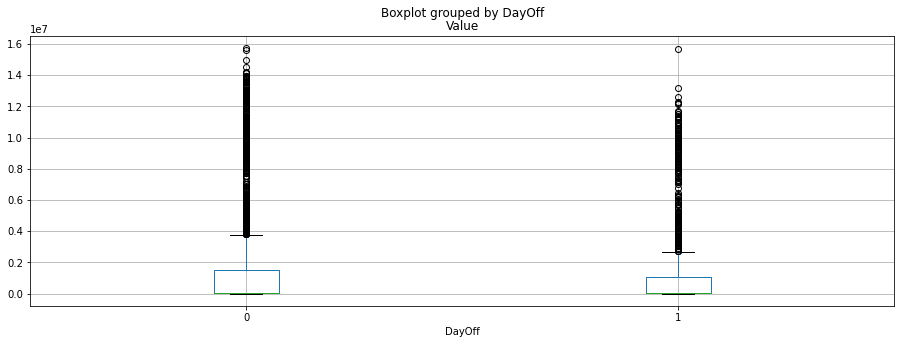

In [126]:
plt.figure(figsize=(15,5))
ax = plt.subplot(111)

d123_filled.loc[(d123_filled.anomesdia.dt.year==2015)].boxplot(column='Value',by='DayOff', ax=ax)

AxesSubplot(0.1,0.15;0.8x0.75)


(array([1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08, 1.e+09]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

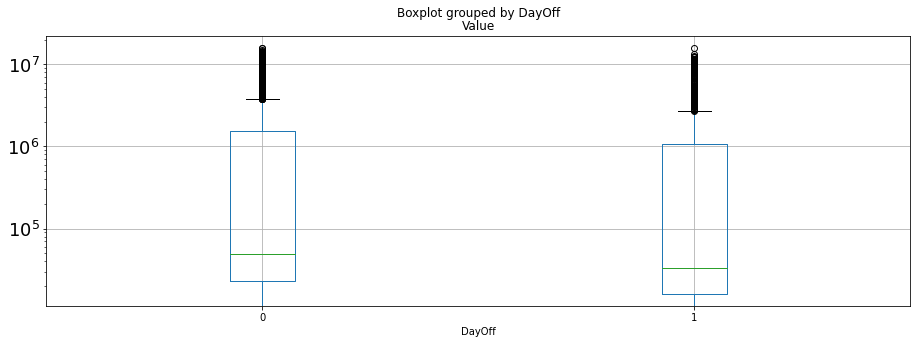

In [127]:
plt.figure(figsize=(15,5))
ax = plt.subplot(111)

print( d123_filled.loc[(d123_filled.anomesdia.dt.year==2015)].boxplot(column='Value',by='DayOff', ax=ax) )

plt.yscale('log')
plt.yticks(fontsize=18)

### Parece que em termos da <u>maior parte dos dados</u>, praticamente não há diferença!

 - A diferença se dá, principalmente, em <u>outliers</u>!

Pontualmente alguns prédios gastam **muito** mais em dias úteis que em feriados. Mas são **dias muito específicos**

<hr />

### Vamos dar uma olhada, como o consumo se dá em cada prédio?

<AxesSubplot:title={'center':'Value'}, xlabel='SiteId'>

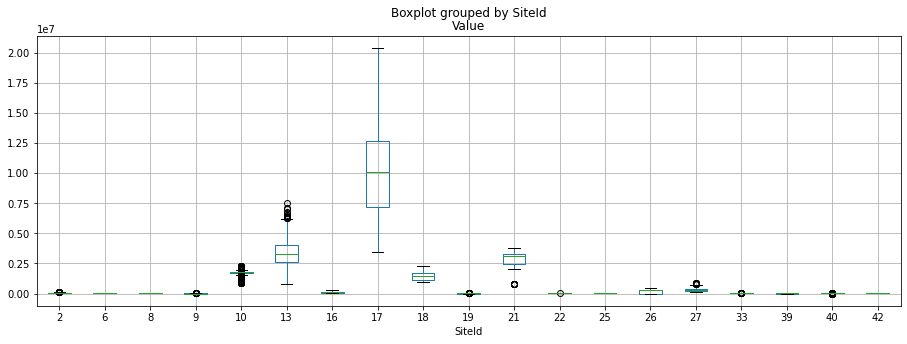

In [128]:
plt.figure(figsize=(15,5))
ax = plt.subplot(111)
d123.boxplot(column='Value', by='SiteId',ax=ax,)

# Pra facilitar, vamos ver <u>em ordem de consumo</u>

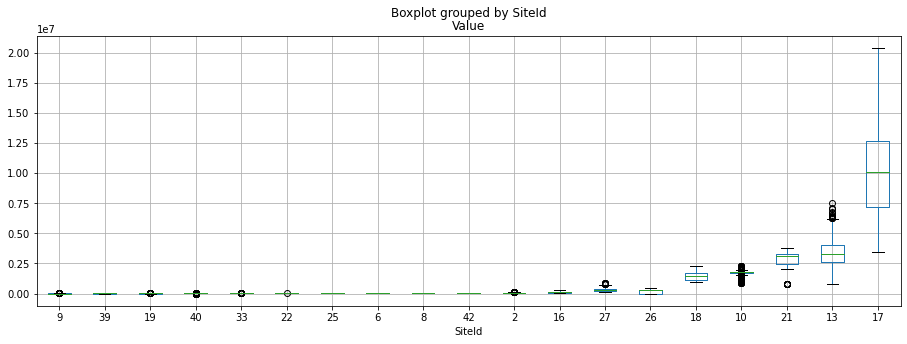

In [129]:
plt.figure(figsize=(15,5))
ax = plt.subplot(111)
aux = d123_filled.copy()
order = aux.groupby('SiteId').Value.median()
aux.loc[:,'SiteId'] = aux.SiteId.replace(order)
aux.boxplot(column='Value', by='SiteId',ax=ax,)
plt.xticks(range(1,order.shape[0]+1),order.sort_values().index);
# aux

### E, como a diferença de consumo de um pro outro é muito grande, vamos ver em outra escala...

(array([1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07,
        1.e+08, 1.e+09]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

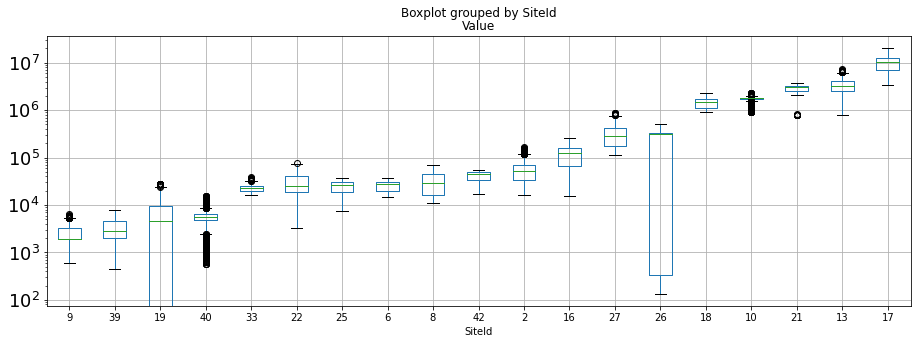

In [130]:
plt.figure(figsize=(15,5))
ax = plt.subplot(111)
aux = d123_filled.copy()
order = aux.groupby('SiteId').Value.median()
aux.loc[:,'SiteId'] = aux.SiteId.replace(order)
aux.boxplot(column='Value', by='SiteId',ax=ax,)
plt.xticks(range(1,order.shape[0]+1),order.sort_values().index);
plt.yscale('log')
plt.yticks(fontsize=18)

# Dahora! Será que isso muda de um ano pro outro?

In [131]:
aux

,SiteId,anomesdia,Value,Temperature_at_0,Temperature_at_5,Temperature_at_10,Temperature_at_15,Temperature_at_20,Temperature_at_25,Surface,Sampling,BaseTemperature,DayOff,Temperature_at_0_null,Temperature_at_5_null,Temperature_at_10_null,Temperature_at_15_null,Temperature_at_20_null,Temperature_at_25_null
0,53453.188631,2014-01-01,27544.962283,0.0,17.042857,17.708333,0.0,0.0,0.000000,6098.278376,30.0,18.0,0,1,0,0,1,1,1
1,53453.188631,2014-01-02,27796.693028,0.0,19.075000,19.020833,0.0,0.0,0.000000,6098.278376,30.0,18.0,0,1,0,0,1,1,1
2,53453.188631,2014-01-03,33271.643392,0.0,20.300000,20.520833,0.0,0.0,0.000000,6098.278376,30.0,18.0,0,1,0,0,1,1,1
3,53453.188631,2014-01-04,32460.715987,0.0,21.862500,22.020833,0.0,0.0,0.000000,6098.278376,30.0,18.0,1,1,0,0,1,1,1
4,53453.188631,2014-01-05,36153.753829,0.0,20.612500,20.750000,0.0,0.0,0.000000,6098.278376,30.0,18.0,1,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27697,45184.932903,2017-12-24,20279.161247,0.0,8.748214,0.000000,0.0,0.0,7.720833,1032.735063,15.0,18.0,1,1,0,1,1,1,0
27698,45184.932903,2017-12-25,20279.161247,0.0,10.205455,0.000000,0.0,0.0,9.259879,1032.735063,15.0,18.0,0,1,0,1,1,1,0
27699,45184.932903,2017-12-26,20279.161247,0.0,11.320755,0.000000,0.0,0.0,10.009375,1032.735063,15.0,18.0,0,1,0,1,1,1,0
27700,45184.932903,2017-12-27,20279.161247,0.0,13.001786,0.000000,0.0,0.0,11.536458,1032.735063,15.0,18.0,0,1,0,1,1,1,0


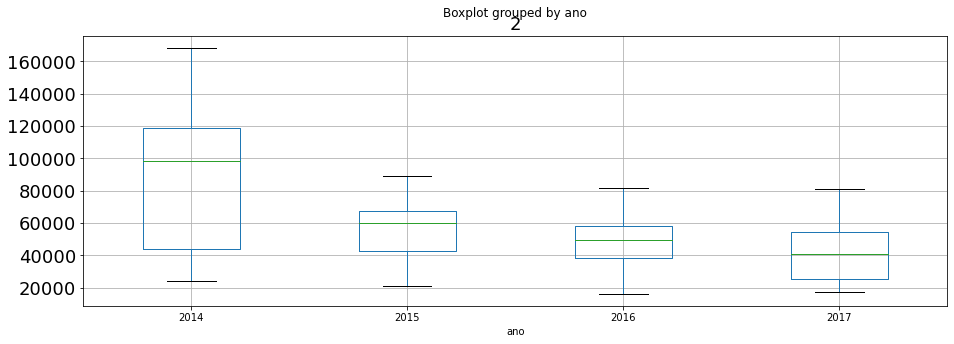

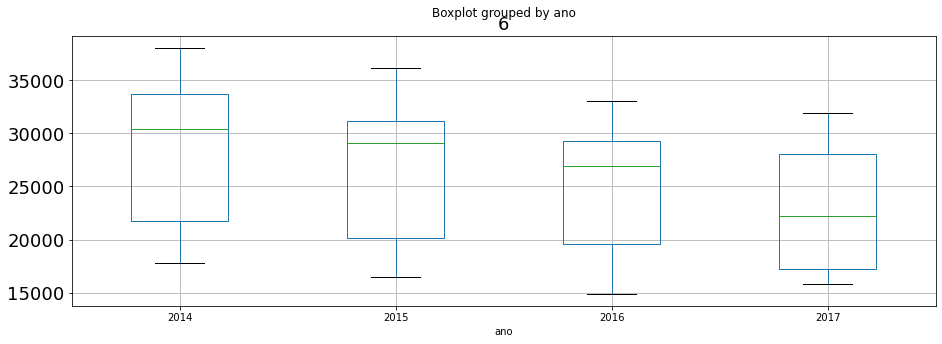

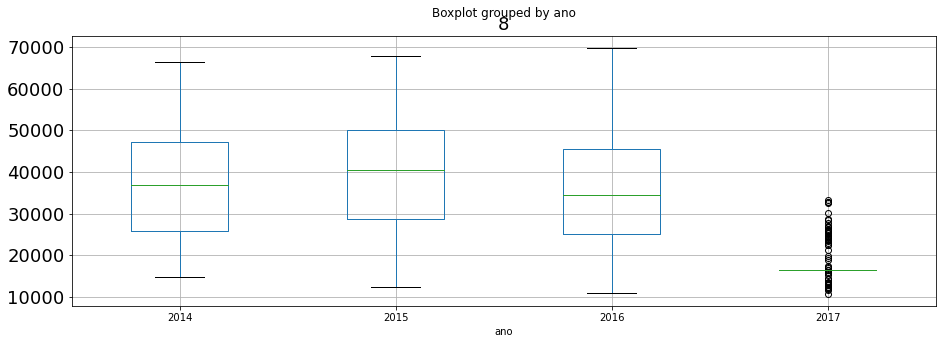

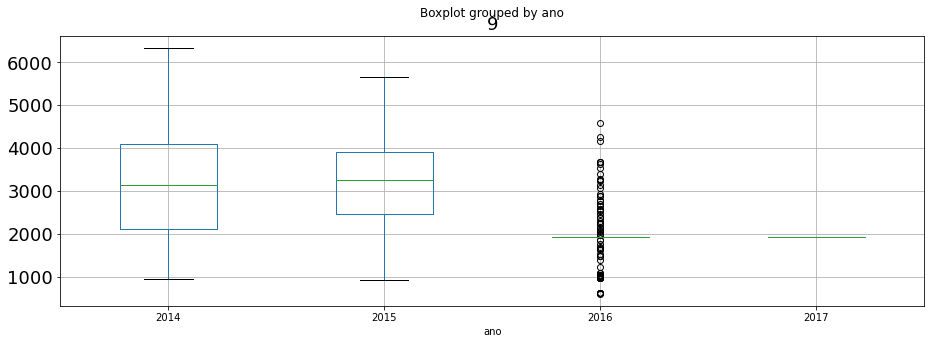

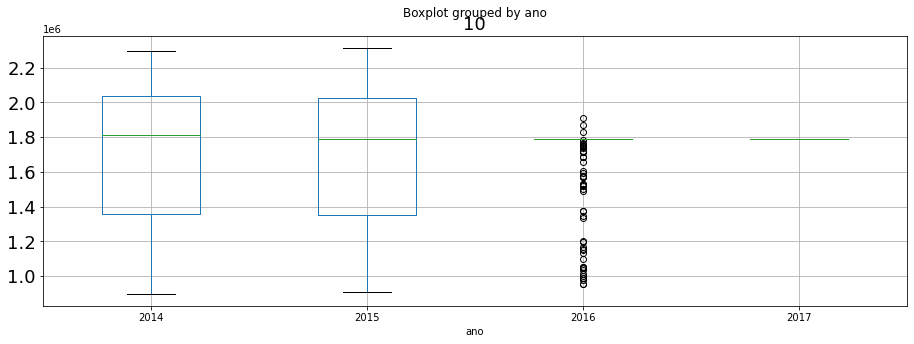

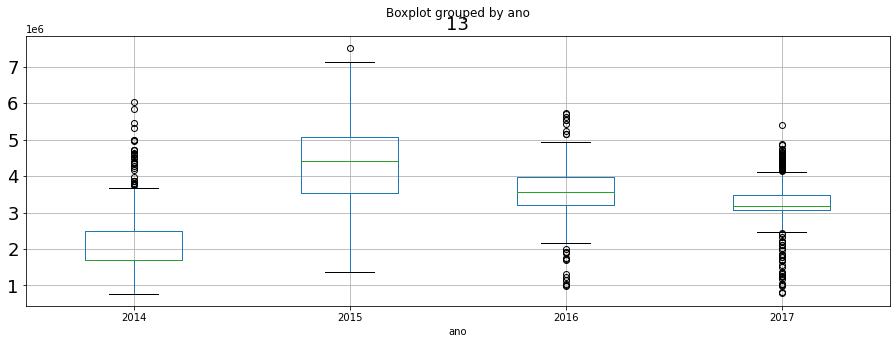

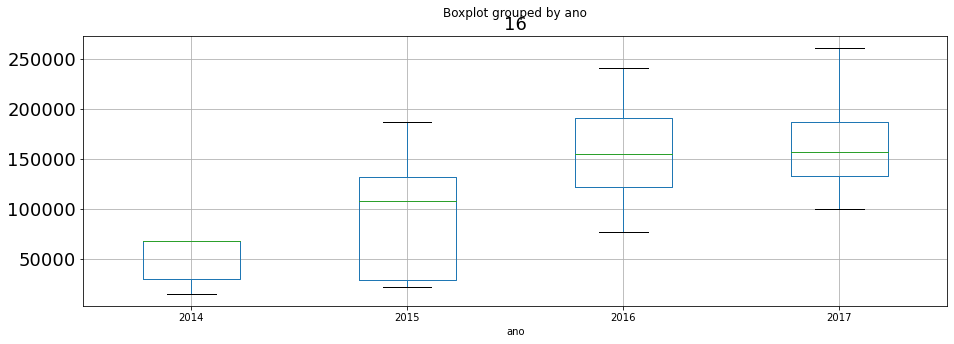

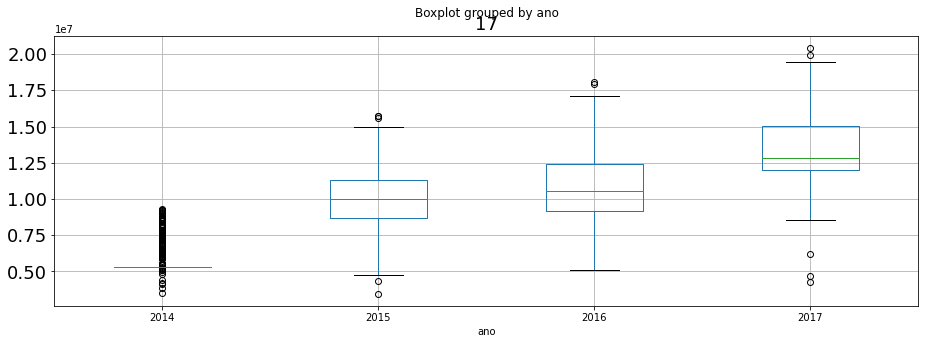

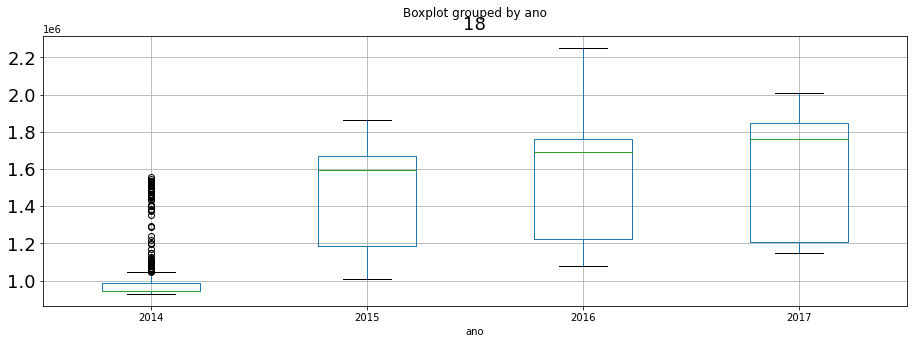

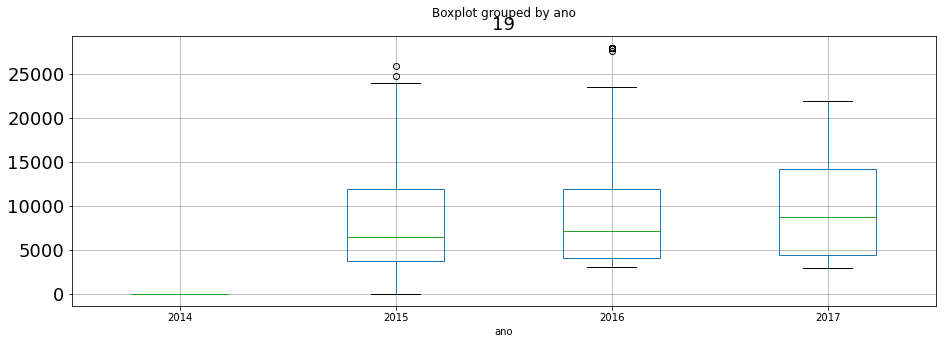

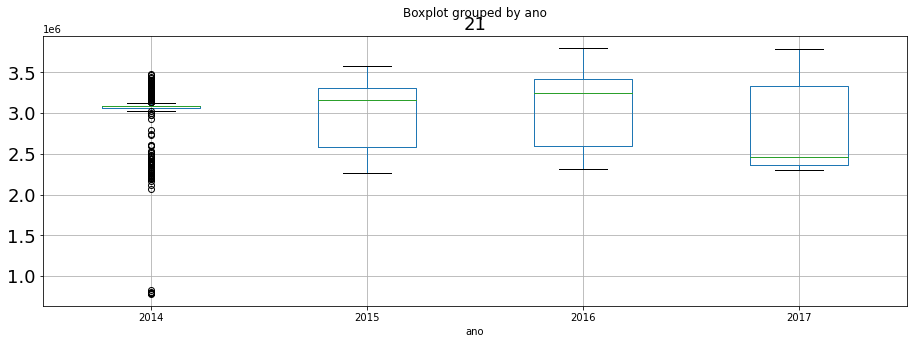

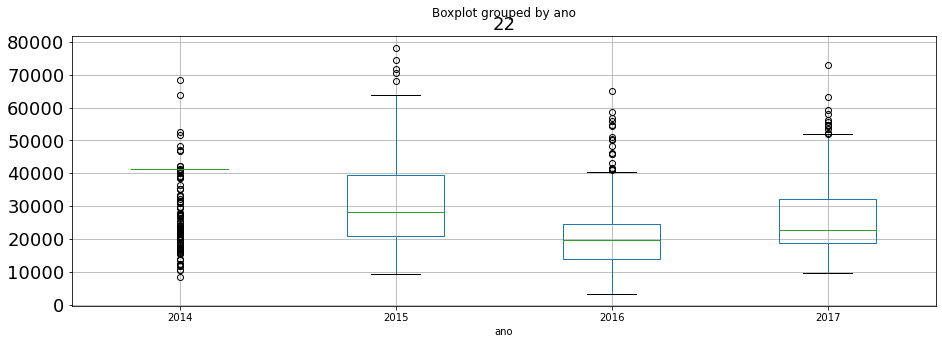

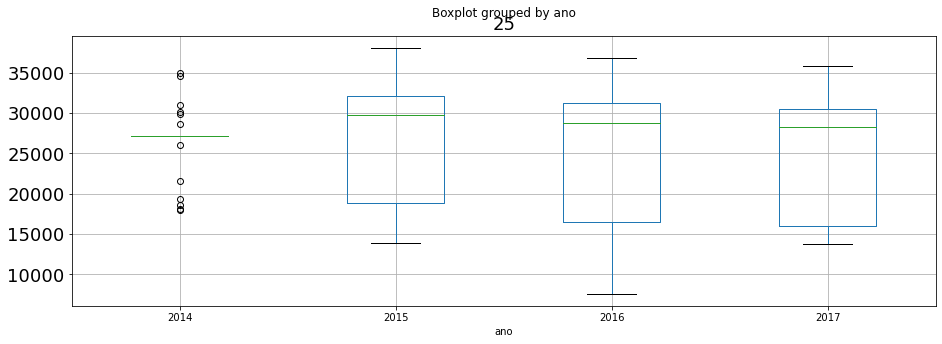

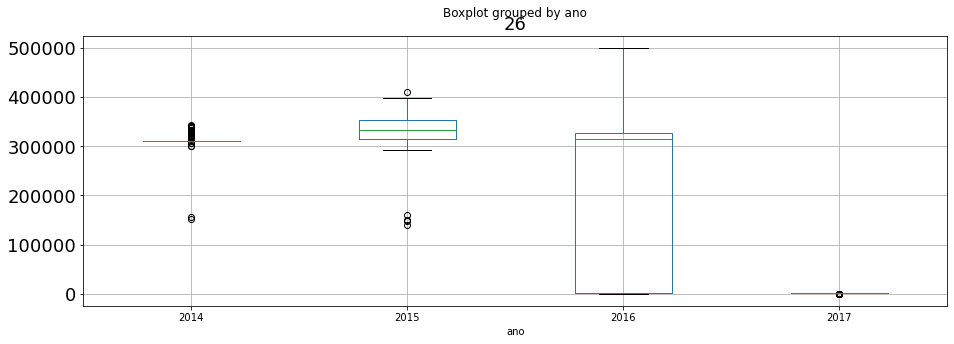

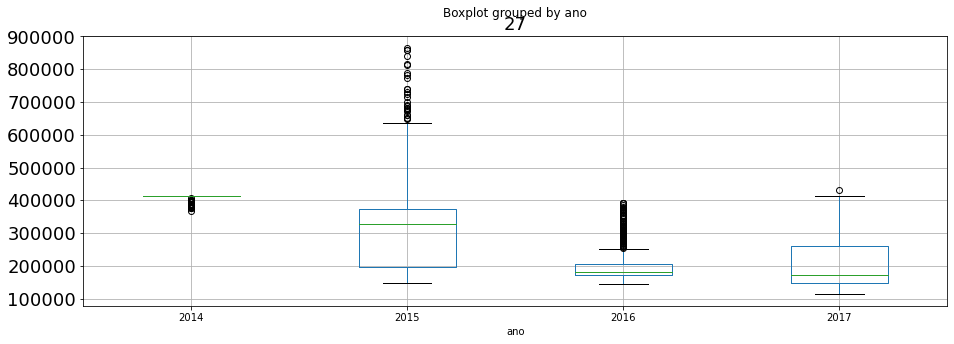

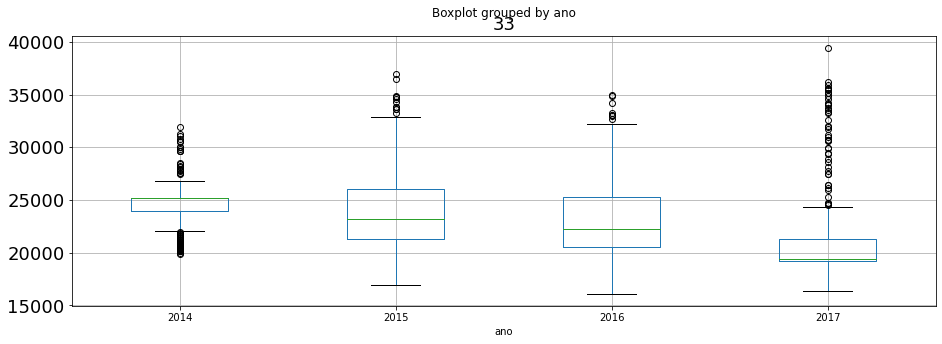

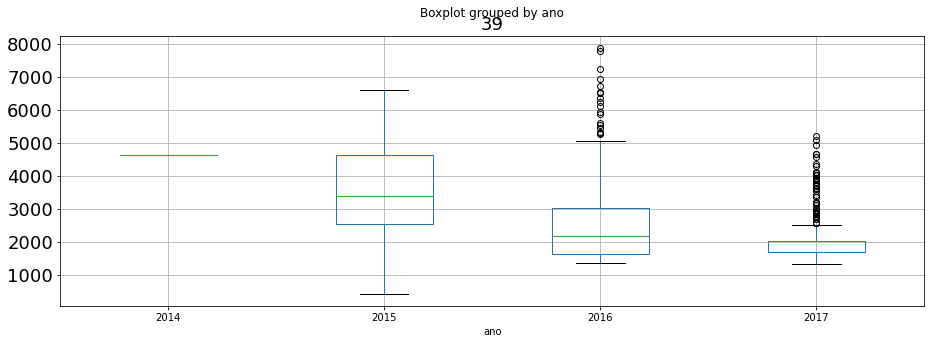

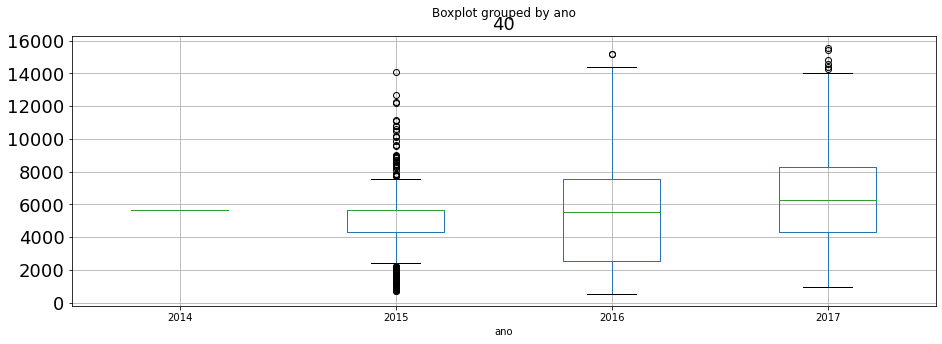

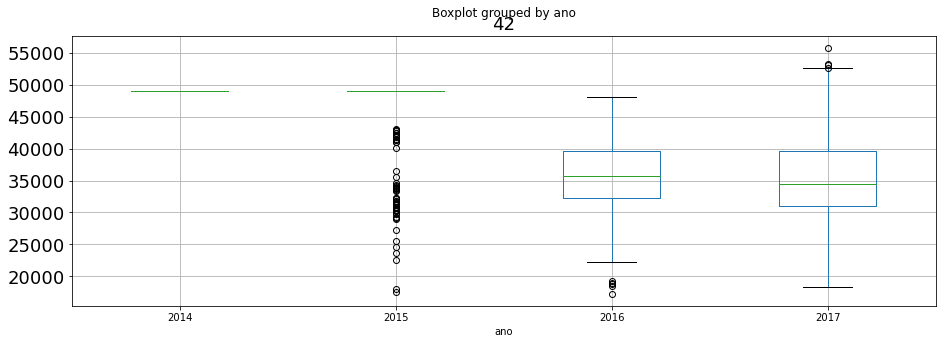

In [132]:
for site in np.sort( d123_filled.SiteId.unique() ):

    plt.figure(figsize=(15,5))
    ax = plt.subplot(1,1,1)
    aux = d123_filled.loc[d123_filled.SiteId==site].copy()
    aux.loc[:,'ano'] = aux.anomesdia.dt.year
    aux.boxplot(column='Value', by='ano',ax=ax)
#     plt.yscale('log')
    plt.yticks(fontsize=18)
    plt.title(site,fontsize=18)

### Note que, em alguns casos, há tendência de aumento, em outros de redução.

# Vamos lembrar do nosso objetivo:

<br />
<hr />
<span style='font-size:30pt;'>&ldquo;</span>

> **Para começar**, se soubermos, pelo menos, **quais prédios irão extrapolar essa meta**, nós já temos um pessoal que consegue ir em alguns deles pra fazer uma análise mais detalhada do consumo, e, ainda por cima, priorizar a consolidação desses dados.
>
> O que precisamos **hoje** é saber **quais prédios devemos <u>priorizar</u> para que o time faça essa análise detalhada**

<span style='font-size:30pt;'>&rdquo;</span>
<hr />

**Não** estamos interessados, necessariamente, em **aumentos graduais**, e sim, em **picos de consumo**!

### Vamos construir essa variável resposta?

 - Para termos uma base, vamos tomar como **consumo médio** o que foi observado no ano de $2015$, e procuraremos casos em que esse consumo foi extrapolado.
 
 - Note que poderíamos ter escolhido outro ano, ou até mesmo um período menor que esse. Mas como nossa intenção não é acertar no mínimo detalhe quem vai consumir muito, mas **fazer uma priorização para o time**, essa variável talvez seja suficiente (quem vai decidir é a área de negócio, quando apresentarmos os resultados!)

In [133]:
def get_media_dev(grp):
    grp.loc[:,'Value_bool'] = grp['Value'] >    np.mean(grp.loc[grp['anomesdia'].dt.year==2015].Value) + \
                                             1.5*np.std(grp.loc[grp['anomesdia'].dt.year==2015].Value)
    return grp

d123_filled.loc[:,'Value_bool'] = d123_filled.groupby(['SiteId'])[['Value','anomesdia']].apply(get_media_dev)['Value_bool']
d123_filled

,SiteId,anomesdia,Value,Temperature_at_0,Temperature_at_5,Temperature_at_10,Temperature_at_15,Temperature_at_20,Temperature_at_25,Surface,Sampling,BaseTemperature,DayOff,Temperature_at_0_null,Temperature_at_5_null,Temperature_at_10_null,Temperature_at_15_null,Temperature_at_20_null,Temperature_at_25_null,Value_bool
0,2,2014-01-01,27544.962283,0.0,17.042857,17.708333,0.0,0.0,0.000000,6098.278376,30.0,18.0,0,1,0,0,1,1,1,False
1,2,2014-01-02,27796.693028,0.0,19.075000,19.020833,0.0,0.0,0.000000,6098.278376,30.0,18.0,0,1,0,0,1,1,1,False
2,2,2014-01-03,33271.643392,0.0,20.300000,20.520833,0.0,0.0,0.000000,6098.278376,30.0,18.0,0,1,0,0,1,1,1,False
3,2,2014-01-04,32460.715987,0.0,21.862500,22.020833,0.0,0.0,0.000000,6098.278376,30.0,18.0,1,1,0,0,1,1,1,False
4,2,2014-01-05,36153.753829,0.0,20.612500,20.750000,0.0,0.0,0.000000,6098.278376,30.0,18.0,1,1,0,0,1,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27697,42,2017-12-24,20279.161247,0.0,8.748214,0.000000,0.0,0.0,7.720833,1032.735063,15.0,18.0,1,1,0,1,1,1,0,False
27698,42,2017-12-25,20279.161247,0.0,10.205455,0.000000,0.0,0.0,9.259879,1032.735063,15.0,18.0,0,1,0,1,1,1,0,False
27699,42,2017-12-26,20279.161247,0.0,11.320755,0.000000,0.0,0.0,10.009375,1032.735063,15.0,18.0,0,1,0,1,1,1,0,False
27700,42,2017-12-27,20279.161247,0.0,13.001786,0.000000,0.0,0.0,11.536458,1032.735063,15.0,18.0,0,1,0,1,1,1,0,False


In [134]:
d123_filled.loc[ d123_filled.Value_bool==True ]

,SiteId,anomesdia,Value,Temperature_at_0,Temperature_at_5,Temperature_at_10,Temperature_at_15,Temperature_at_20,Temperature_at_25,Surface,Sampling,BaseTemperature,DayOff,Temperature_at_0_null,Temperature_at_5_null,Temperature_at_10_null,Temperature_at_15_null,Temperature_at_20_null,Temperature_at_25_null,Value_bool
5,2,2014-01-06,107778.254308,0.0,19.0000,19.104167,0.0,0.0,0.0,6098.278376,30.0,18.0,0,1,0,0,1,1,1,True
6,2,2014-01-07,119079.745089,0.0,18.9125,19.062500,0.0,0.0,0.0,6098.278376,30.0,18.0,0,1,0,0,1,1,1,True
7,2,2014-01-08,124489.669246,0.0,19.8375,19.791667,0.0,0.0,0.0,6098.278376,30.0,18.0,0,1,0,0,1,1,1,True
8,2,2014-01-09,117514.984305,0.0,17.2625,17.191489,0.0,0.0,16.0,6098.278376,30.0,18.0,0,1,0,0,1,1,0,True
9,2,2014-01-10,85397.650001,0.0,17.4625,17.437500,0.0,0.0,0.0,6098.278376,30.0,18.0,0,1,0,0,1,1,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26239,40,2017-12-24,10562.277517,0.0,0.0000,0.000000,0.0,0.0,0.0,393.357430,10.0,18.0,1,1,1,1,1,1,1,True
26240,40,2017-12-25,10562.277517,0.0,0.0000,0.000000,0.0,0.0,0.0,393.357430,10.0,18.0,0,1,1,1,1,1,1,True
26241,40,2017-12-26,10562.277517,0.0,0.0000,0.000000,0.0,0.0,0.0,393.357430,10.0,18.0,0,1,1,1,1,1,1,True
26242,40,2017-12-27,10562.277517,0.0,0.0000,0.000000,0.0,0.0,0.0,393.357430,10.0,18.0,0,1,1,1,1,1,1,True



    
<center style='background-color: yellow'><br/><h1>Palavra-chave: CONSUMO</h1><br/>&nbsp;</center>

# Como essa variável está se comportando mês-a-mês?

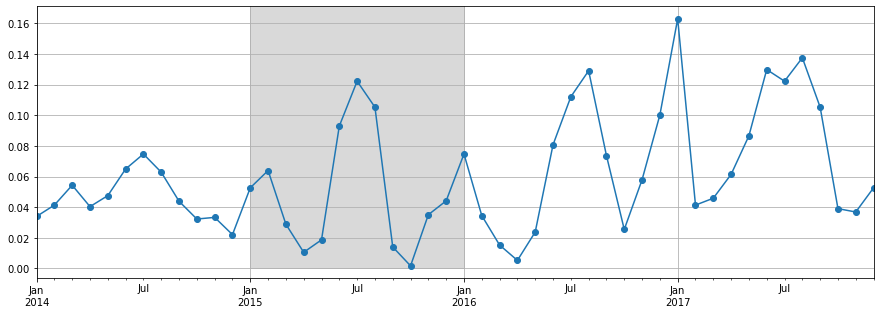

In [135]:
plt.figure(figsize=(15,5))
ax = plt.subplot(1,1,1)
d123_filled.set_index('anomesdia').groupby(lambda idx: pd.to_datetime(idx.strftime('%Y-%m'))).Value_bool.mean().plot(ax=ax, marker='o')
ym,yM = plt.ylim()
plt.fill_between([pd.to_datetime('2015-01-01'),pd.to_datetime('2016-01-01')],[1,1],color='k',alpha=.15)
plt.ylim(ym,yM)
plt.grid();

# Note como ela sazonal!

 - Em 2015, como é o ano em que definimos a média, os valores tem uma tendência a serem um pouco mais baixos
   - Eles entraram na <u>definição da média</u>!

# Vamos ver quais foram os principais locais ofensores em 2016 e 2017?

In [136]:
d123_filled.loc[d123_filled.anomesdia.dt.year==2016].groupby('SiteId').Value_bool.mean().sort_values(ascending=False)

SiteId
16    0.352459
40    0.199454
17    0.163934
19    0.153005
18    0.125683
33    0.054645
39    0.049180
21    0.024590
8     0.016393
22    0.016393
26    0.005464
2     0.002732
25    0.000000
13    0.000000
10    0.000000
9     0.000000
27    0.000000
6     0.000000
42    0.000000
Name: Value_bool, dtype: float64

In [137]:
d123_filled.loc[d123_filled.anomesdia.dt.year==2017].groupby('SiteId').Value_bool.mean().sort_values(ascending=False)

SiteId
17    0.472376
16    0.381215
18    0.262431
40    0.229282
19    0.129834
33    0.077348
22    0.041436
21    0.030387
2     0.002762
39    0.002762
25    0.000000
26    0.000000
27    0.000000
13    0.000000
10    0.000000
9     0.000000
8     0.000000
6     0.000000
42    0.000000
Name: Value_bool, dtype: float64

# Esse local $16$ parece estar de sacanagem.

Vamos ver a série dele

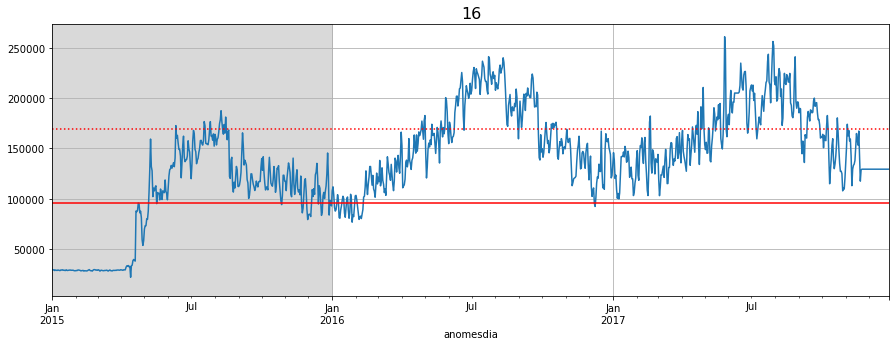

In [138]:
local = 16

plt.figure(figsize=(15,5))
ax = plt.subplot(1,1,1)
d123_filled.loc[d123_filled.SiteId==local].set_index('anomesdia').Value.plot(ax=ax)
m = d123_filled.loc[(d123_filled.SiteId==local) & (d123_filled.anomesdia.dt.year==2015)].Value.mean()
s = d123_filled.loc[(d123_filled.SiteId==local) & (d123_filled.anomesdia.dt.year==2015)].Value.std()

plt.axhline(m, color='r')
plt.axhline(m+1.5*s, color='r', linestyle=':')

plt.xlim(left=pd.to_datetime('2015-01-01'))

plt.title(local,fontsize=16)

ym,yM = plt.ylim()
plt.fill_between([pd.to_datetime('2015-01-01'),pd.to_datetime('2016-01-01')],[yM,yM],color='k',alpha=.15)
plt.ylim(ym,yM)
plt.grid();

# Interessante....houve <u>de fato</u> um aumento de consumo nesse local!


# Vamos pegar outros exemplos pra levar pra área de negócio

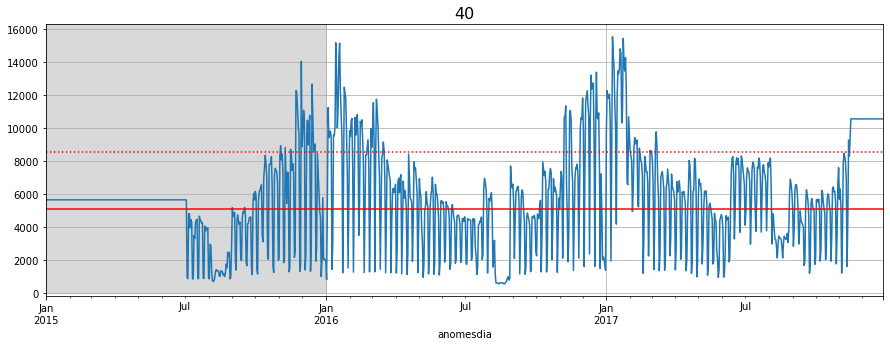

In [139]:
local = 40

plt.figure(figsize=(15,5))
ax = plt.subplot(1,1,1)
d123_filled.loc[d123_filled.SiteId==local].set_index('anomesdia').Value.plot(ax=ax)
m = d123_filled.loc[(d123_filled.SiteId==local) & (d123_filled.anomesdia.dt.year==2015)].Value.mean()
s = d123_filled.loc[(d123_filled.SiteId==local) & (d123_filled.anomesdia.dt.year==2015)].Value.std()

plt.axhline(m, color='r')
plt.axhline(m+1.5*s, color='r', linestyle=':')

plt.xlim(left=pd.to_datetime('2015-01-01'))

plt.title(local,fontsize=16)

ym,yM = plt.ylim()
plt.fill_between([pd.to_datetime('2015-01-01'),pd.to_datetime('2016-01-01')],[yM,yM],color='k',alpha=.15)
plt.ylim(ym,yM)
plt.grid();

# Note o impacto da nossa escolha de como preencher os valores faltantes!

 - Uma outra opção seria simplesmente jogar esses dias fora para esses locais!
   - Como isso impactaria a média?

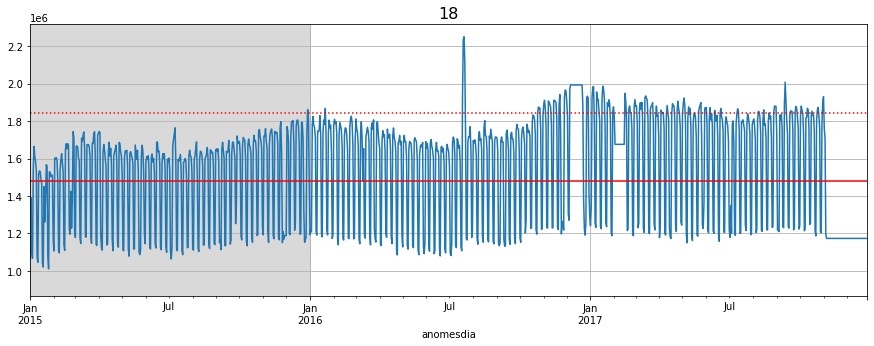

In [140]:
local = 18

plt.figure(figsize=(15,5))
ax = plt.subplot(1,1,1)
d123_filled.loc[d123_filled.SiteId==local].set_index('anomesdia').Value.plot(ax=ax)
m = d123_filled.loc[(d123_filled.SiteId==local) & (d123_filled.anomesdia.dt.year==2015)].Value.mean()
s = d123_filled.loc[(d123_filled.SiteId==local) & (d123_filled.anomesdia.dt.year==2015)].Value.std()

plt.axhline(m, color='r')
plt.axhline(m+1.5*s, color='r', linestyle=':')

plt.xlim(left=pd.to_datetime('2015-01-01'))

plt.title(local,fontsize=16)

ym,yM = plt.ylim()
plt.fill_between([pd.to_datetime('2015-01-01'),pd.to_datetime('2016-01-01')],[yM,yM],color='k',alpha=.15)
plt.ylim(ym,yM)
plt.grid();

 - A decisão de uma boa variável resposta pode levar **semanas ou meses**, em intensa discussão com a área de negócio.
 
 - Entretanto é <span style="font-size=16pt;">muito importante</span> usar bem esse tempo! Uma definição errada pode inviabilizar o projeto todo no final!
 
<br/>
<center style="font-size:18pt;">Cerca de $70\%$ do tempo de um projeto de Machine Learning é em preparação dos dados e definição do desenho da solução!</center>
<br/>
<center style="font-size:18pt; background-color:yellow"><br/>Isso não é à toa!<br/>&nbsp;</center>

# Por fim, vamos salvar esses dados trabalhados em um outro arquivo, para continuarmos o trabalho na próxima aula!

In [141]:
d123_filled

,SiteId,anomesdia,Value,Temperature_at_0,Temperature_at_5,Temperature_at_10,Temperature_at_15,Temperature_at_20,Temperature_at_25,Surface,Sampling,BaseTemperature,DayOff,Temperature_at_0_null,Temperature_at_5_null,Temperature_at_10_null,Temperature_at_15_null,Temperature_at_20_null,Temperature_at_25_null,Value_bool
0,2,2014-01-01,27544.962283,0.0,17.042857,17.708333,0.0,0.0,0.000000,6098.278376,30.0,18.0,0,1,0,0,1,1,1,False
1,2,2014-01-02,27796.693028,0.0,19.075000,19.020833,0.0,0.0,0.000000,6098.278376,30.0,18.0,0,1,0,0,1,1,1,False
2,2,2014-01-03,33271.643392,0.0,20.300000,20.520833,0.0,0.0,0.000000,6098.278376,30.0,18.0,0,1,0,0,1,1,1,False
3,2,2014-01-04,32460.715987,0.0,21.862500,22.020833,0.0,0.0,0.000000,6098.278376,30.0,18.0,1,1,0,0,1,1,1,False
4,2,2014-01-05,36153.753829,0.0,20.612500,20.750000,0.0,0.0,0.000000,6098.278376,30.0,18.0,1,1,0,0,1,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27697,42,2017-12-24,20279.161247,0.0,8.748214,0.000000,0.0,0.0,7.720833,1032.735063,15.0,18.0,1,1,0,1,1,1,0,False
27698,42,2017-12-25,20279.161247,0.0,10.205455,0.000000,0.0,0.0,9.259879,1032.735063,15.0,18.0,0,1,0,1,1,1,0,False
27699,42,2017-12-26,20279.161247,0.0,11.320755,0.000000,0.0,0.0,10.009375,1032.735063,15.0,18.0,0,1,0,1,1,1,0,False
27700,42,2017-12-27,20279.161247,0.0,13.001786,0.000000,0.0,0.0,11.536458,1032.735063,15.0,18.0,0,1,0,1,1,1,0,False


In [142]:
d123_filled.to_csv('base_tratada.csv',index=False, header=True)

# Vamos revisar o que fizemos hoje?

<ul style="font-size:16pt;">
    <li>Entendimento do problema com a área de negócio<br/><br/></li>
    <li>Tratamento de variáveis e exclusão de casos em que a análise não se aplica<br/><br/></li>
    <li>Consolidação das informações em uma <b>tabela de modelagem</b><br/><br/></li>
    <li>Entendimento do perfil de consumo de prédios<br/><br/></li>
    <li>Construção da <b>variável resposta</b><br/><br/></li>
    <li>Validação da variável resposta com casos reais<br/><br/></li>